# Livrable IA HumanForYou

### Groupe 6 :
- Zakariae HAMZAOUI
- Ilyass NACIRI
- Fallou BADIANE
- Abel MANIGOUE

## Contexte et Objectifs

### IA pour HumanForYou

L'entreprise pharmaceutique **HumanForYou**, basée en **Inde**, emploie environ **4 000 personnes**. Chaque année, elle fait face à un **taux de rotation de 15 %**, ce qui l'oblige à recruter régulièrement de nouveaux profils sur le marché de l'emploi.

La direction considère que ce **turnover** est problématique pour plusieurs raisons :
- **Retards dans les projets** : Le départ des employés ralentit l’avancement des projets, impactant ainsi la réputation de l’entreprise auprès de ses clients et partenaires.
- **Charge accrue pour les RH** : Le service des ressources humaines doit mobiliser d’importants moyens pour recruter de nouveaux employés.
- **Perte de temps liée à l'intégration** : L’arrivée de nouveaux employés nécessite un temps d’adaptation et de formation avant qu’ils ne soient pleinement opérationnels.

C'est dans ce contexte que **vous**, spécialistes de l'analyse de données, êtes sollicités pour :
- Identifier les **facteurs influençant** ce taux de rotation.
- Construire des **modèles prédictifs** permettant de proposer des pistes d'amélioration pour renforcer la fidélisation des employés.



## Données fournies

Le service des ressources humaines met à disposition plusieurs fichiers **CSV** contenant des informations anonymisées sur les employés.

### 1. Données du service des ressources humaines

Ces données contiennent des informations générales sur chaque employé :

- **Age** : Âge de l'employé en 2015.
- **Attrition** : Indique si l’employé a quitté l’entreprise en 2016 (**objet de l’étude**).
- **BusinessTravel** : Fréquence des déplacements professionnels en 2015.
  - `Non-Travel` : Jamais.
  - `Travel_Rarely` : Rarement.
  - `Travel_Frequently` : Fréquemment.
- **DistanceFromHome** : Distance (en km) entre le domicile et l’entreprise.
- **Education** : Niveau d’étude :
  - `1` = Avant College (équivalent Bac).
  - `2` = College (équivalent Bac+2).
  - `3` = Bachelor (équivalent Bac+3).
  - `4` = Master (équivalent Bac+5).
  - `5` = PhD (Doctorat).
- **EducationField** : Domaine d’étude principal.
- **EmployeeCount** : Booléen (`1` si l’employé était comptabilisé en 2015).
- **EmployeeID** : Identifiant unique de l’employé.
- **Gender** : Sexe de l’employé.
- **JobLevel** : Niveau hiérarchique (de `1` à `5`).
- **JobRole** : Métier dans l’entreprise.
- **MaritalStatus** : Statut marital (`Célibataire`, `Marié`, `Divorcé`).
- **MonthlyIncome** : Salaire brut mensuel en roupies.
- **NumCompaniesWorked** : Nombre d’entreprises dans lesquelles l’employé a travaillé avant HumanForYou.
- **Over18** : Indique si l’employé a plus de 18 ans.
- **PercentSalaryHike** : Pourcentage d’augmentation de salaire en 2015.
- **StandardHours** : Nombre d’heures contractuelles par jour.
- **StockOptionLevel** : Niveau d’investissement en actions de l’entreprise.
- **TotalWorkingYears** : Années d’expérience dans le même domaine.
- **TrainingTimesLastYear** : Nombre de jours de formation en 2015.
- **YearsAtCompany** : Ancienneté dans l’entreprise.
- **YearsSinceLastPromotion** : Années écoulées depuis la dernière augmentation individuelle.
- **YearsWithCurrentManager** : Années sous la responsabilité du manager actuel.

📂 **Fichier : `general_data.csv`** (_550,0 Ko_)


### 2. Dernière évaluation du manager

Ce fichier contient l’évaluation de chaque employé réalisée par son manager en **février 2015** :

- **EmployeeID** : Identifiant unique de l’employé.
- **JobInvolvement** : Implication dans le travail (`1` = Faible, `2` = Moyenne, `3` = Importante, `4` = Très importante).
- **PerformanceRating** : Évaluation annuelle des performances :
  - `1` = Faible.
  - `2` = Bon.
  - `3` = Excellent.
  - `4` = Au-delà des attentes.

📂 **Fichier : `manager_survey_data.csv`** (_43,0 Ko_)


### 3. Enquête sur la qualité de vie au travail

Une enquête a été réalisée par les **RH** en **juin 2015** auprès des employés. Bien que non obligatoire, elle a été organisée sur le lieu de travail en concertation avec les managers.

Les employés ont répondu à trois questions, chacune notée de **1 à 4** :
- **EnvironmentSatisfaction** : Satisfaction vis-à-vis de l’environnement de travail.
- **JobSatisfaction** : Satisfaction liée au travail.
- **WorkLifeBalance** : Équilibre entre vie professionnelle et personnelle :
  - `1` = Mauvais.
  - `2` = Satisfaisant.
  - `3` = Très satisfaisant.
  - `4` = Excellent.

🔹 Si un employé n’a pas répondu à une question, la valeur `NA` est utilisée.

📂 **Fichier : `employee_survey_data.csv`** (_52,0 Ko_)


### 4. Horaires de travail

L’entreprise utilise des **badgeuses** pour enregistrer les **heures d’entrée et de sortie** des employés. Ces données couvrent une période représentative de l’activité moyenne de l’entreprise, allant **du 1er janvier au 31 décembre 2015**.

📂 **Fichiers :** _(données horaires détaillées)_


📌 **Objectif final** : Exploiter ces données pour analyser les **facteurs déterminants du turnover**, construire des **modèles prédictifs**, et proposer des **recommandations** afin d’améliorer la fidélisation des employés chez **HumanForYou**.


## 1. Chargement et Préparation des Données

### 1.1 Importation des données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


### 1.2 Load and Merge Data (Charger et Fusionner les Données)
Objectif : Charger tous les fichiers CSV, puis fusionner les données sur EmployeeID.

In [2]:

employee_df = pd.read_csv("data/employee_survey_data.csv")
general_df = pd.read_csv("data/general_data.csv")
manager_df = pd.read_csv("data/manager_survey_data.csv")
in_time_df = pd.read_csv("data/in_time.csv")
out_time_df = pd.read_csv("data/out_time.csv")

# Merge employee_df and general_df on EmployeeID
merged_df = pd.merge(employee_df, general_df, on="EmployeeID", how="inner")

# Merge in manager_df
merged_df = pd.merge(merged_df, manager_df, on="EmployeeID", how="inner")


# Afficher un aperçu
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
 4   Age                      4410 non-null   int64  
 5   Attrition                4410 non-null   object 
 6   BusinessTravel           4410 non-null   object 
 7   Department               4410 non-null   object 
 8   DistanceFromHome         4410 non-null   int64  
 9   Education                4410 non-null   int64  
 10  EducationField           4410 non-null   object 
 11  EmployeeCount            4410 non-null   int64  
 12  Gender                   4410 non-null   object 
 13  JobLevel                 4410 non-null   int64  
 14  JobRole                 

### 1.3 Supprission des Colonnes Inutiles/Sensibles
Objectif : Supprimer les colonnes qui n'apportent pas d'informations utiles à l'analyse.
#### Colonnes à supprimer :
- Over18 : Tous les employés ont plus de 18 ans.
- EmployeeCount : Toujours égal à 1 (inutile).
- StandardHours : Toujours égal à 8 (inutile).

Remarque: La colonne "Gender" est laissé pour tester son impact sur le resultat.

In [3]:
# Supprimer les colonnes inutiles
columns_to_drop = ["EmployeeCount", "Over18", "StandardHours"]
merged_df.drop(columns=columns_to_drop, axis=1, inplace=True, errors="ignore")
# Visualiser apres suppression de quelques colonnes
print(merged_df.head())

   EmployeeID  EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  Age  \
0           1                      3.0              4.0              2.0   51   
1           2                      3.0              2.0              4.0   31   
2           3                      2.0              2.0              1.0   32   
3           4                      4.0              4.0              3.0   38   
4           5                      4.0              1.0              3.0   32   

  Attrition     BusinessTravel              Department  DistanceFromHome  \
0        No      Travel_Rarely                   Sales                 6   
1       Yes  Travel_Frequently  Research & Development                10   
2        No  Travel_Frequently  Research & Development                17   
3        No         Non-Travel  Research & Development                 2   
4        No      Travel_Rarely  Research & Development                10   

   Education  ... NumCompaniesWorked PercentSalaryHike  

### 1.4 Nettoyage et Préparation des Données de Temps
Objectif : Transformer les fichiers in_time et out_time pour obtenir le nombre d'heures travaillées.

#### Actions :
- Convertir les dates en format datetime.
- Calculer la durée travaillée chaque jour (out_time - in_time).
- Calculer la moyenne des heures travaillées pour chaque employé.

In [4]:
# Rename 'Unnamed: 0' to 'EmployeeID' for easier merging
in_time_df.rename(columns={"Unnamed: 0": "EmployeeID"}, inplace=True)
out_time_df.rename(columns={"Unnamed: 0": "EmployeeID"}, inplace=True)

# We’ll create a separate DataFrame that holds each employee’s average work hours
# Convert time columns to datetime (ignore errors if any NaNs or incorrect formats appear)
time_cols = in_time_df.columns[1:]  # skip EmployeeID column
in_time_df[time_cols] = in_time_df[time_cols].apply(pd.to_datetime, errors="coerce")
out_time_df[time_cols] = out_time_df[time_cols].apply(pd.to_datetime, errors="coerce")

# Calculate the daily hours as OUT - IN
# This returns a DataFrame of timedeltas; convert to hours by dividing total_seconds by 3600
daily_hours = out_time_df[time_cols].sub(in_time_df[time_cols])
daily_hours = daily_hours.apply(lambda row: row.dt.total_seconds() / 3600)

# Create average hours feature per employee
avg_hours_df = pd.DataFrame({
    "EmployeeID": in_time_df["EmployeeID"],
    "AverageWorkHours": daily_hours.mean(axis=1)  # mean across all days
})

# Merge avg_hours_df with merged_df
if "AverageWorkHours" in merged_df.columns:
    merged_df.drop(columns=["AverageWorkHours"], inplace=True)


In [5]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
 4   Age                      4410 non-null   int64  
 5   Attrition                4410 non-null   object 
 6   BusinessTravel           4410 non-null   object 
 7   Department               4410 non-null   object 
 8   DistanceFromHome         4410 non-null   int64  
 9   Education                4410 non-null   int64  
 10  EducationField           4410 non-null   object 
 11  Gender                   4410 non-null   object 
 12  JobLevel                 4410 non-null   int64  
 13  JobRole                  4410 non-null   object 
 14  MaritalStatus           

### 1.5 Fusionner les Données de Temps dans le Dataset Principal
**Objectif** : Ajouter la colonne AverageWorkHours au dataset fusionné.

In [6]:
# Fusionner les données de temps avec le dataset principal
final_df = pd.merge(merged_df, avg_hours_df, on="EmployeeID", how="left")

# Vérifier les mises à jour
print(final_df.columns)


Index(['EmployeeID', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'JobInvolvement', 'PerformanceRating',
       'AverageWorkHours'],
      dtype='object')


### 1.6 Créer et Transformer des Variables Intéressantes
**Objectif** : Transformer les variables en formats exploitables pour l’analyse et les modèles.

#### Transformations importantes :
- Encodage de Attrition : Convertir Yes/No en 1/0.
- Remplacer les valeurs manquantes (NA) dans employee_survey_data.csv par la médiane.
- Encodage des variables catégorielles (BusinessTravel, EducationField, etc.).
- Création d'une variable YearsSinceLastPromotionRatio : YearsSinceLastPromotion / YearsAtCompany.

In [7]:
# Transformer la colonne 'Attrition' en variable binaire
final_df["Attrition"] = final_df["Attrition"].map({"No": 0, "Yes": 1})

# Créer une variable 'YearsSinceLastPromotionRatio'
final_df["YearsSinceLastPromotionRatio"] = final_df["YearsSinceLastPromotion"] / (final_df["YearsAtCompany"] + 1)

# Vérifier les mises à jour
print(final_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   EmployeeID                    4410 non-null   int64  
 1   EnvironmentSatisfaction       4385 non-null   float64
 2   JobSatisfaction               4390 non-null   float64
 3   WorkLifeBalance               4372 non-null   float64
 4   Age                           4410 non-null   int64  
 5   Attrition                     4410 non-null   int64  
 6   BusinessTravel                4410 non-null   object 
 7   Department                    4410 non-null   object 
 8   DistanceFromHome              4410 non-null   int64  
 9   Education                     4410 non-null   int64  
 10  EducationField                4410 non-null   object 
 11  Gender                        4410 non-null   object 
 12  JobLevel                      4410 non-null   int64  
 13  Job

### 1. Gestion des valeurs manquantes

In [8]:
# Vérifier les valeurs manquantes
final_df.isnull().sum()

EmployeeID                       0
EnvironmentSatisfaction         25
JobSatisfaction                 20
WorkLifeBalance                 38
Age                              0
Attrition                        0
BusinessTravel                   0
Department                       0
DistanceFromHome                 0
Education                        0
EducationField                   0
Gender                           0
JobLevel                         0
JobRole                          0
MaritalStatus                    0
MonthlyIncome                    0
NumCompaniesWorked              19
PercentSalaryHike                0
StockOptionLevel                 0
TotalWorkingYears                9
TrainingTimesLastYear            0
YearsAtCompany                   0
YearsSinceLastPromotion          0
YearsWithCurrManager             0
JobInvolvement                   0
PerformanceRating                0
AverageWorkHours                 0
YearsSinceLastPromotionRatio     0
dtype: int64

In [9]:
final_df.drop(columns=["EmployeeID"], inplace=True)

# Imputer les valeurs manquantes pour les variables numériques avec la médiane
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

# Sélection des colonnes numériques
df_num = final_df.select_dtypes(include=[float, int])
imputer.fit(df_num)

# Remplacement des valeurs manquantes
df_num_imputed = pd.DataFrame(imputer.transform(df_num), columns=df_num.columns)

# Vérifier s'il reste des valeurs manquantes
df_num_imputed.isnull().sum()

EnvironmentSatisfaction         0
JobSatisfaction                 0
WorkLifeBalance                 0
Age                             0
Attrition                       0
DistanceFromHome                0
Education                       0
JobLevel                        0
MonthlyIncome                   0
NumCompaniesWorked              0
PercentSalaryHike               0
StockOptionLevel                0
TotalWorkingYears               0
TrainingTimesLastYear           0
YearsAtCompany                  0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
JobInvolvement                  0
PerformanceRating               0
AverageWorkHours                0
YearsSinceLastPromotionRatio    0
dtype: int64

### 2. Encodage des variables catégorielles

In [10]:
# Sélection des colonnes catégorielles
df_cat = final_df.select_dtypes(include=[object, bool])

# Encodage one-hot des variables catégorielles
df_cat_encoded = pd.get_dummies(df_cat)

# Vérification du résultat de l'encodage
df_cat_encoded.head()

BusinessTravel_Non-Travel  BusinessTravel_Travel_Frequently  \
0                      False                             False   
1                      False                              True   
2                      False                              True   
3                       True                             False   
4                      False                             False   

   BusinessTravel_Travel_Rarely  Department_Human Resources  \
0                          True                       False   
1                         False                       False   
2                         False                       False   
3                         False                       False   
4                          True                       False   

   Department_Research & Development  Department_Sales  \
0                              False              True   
1                               True             False   
2                               True             False   
3                               True             False   
4                               True             False   

   EducationField_Human Resources  EducationField_Life Sciences  \
0                           False                          True   
1                           False                          True   
2                           False                         False   
3                           False                          True   
4                           False                         False   

   EducationField_Marketing  EducationField_Medical  ...  \
0                     False                   False  ...   
1                     False                   False  ...   
2                     False                   False  ...   
3                     False                   False  ...   
4                     False                    True  ...   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                          False            False   
1                          False            False   
2                          False            False   
3                          False            False   
4                          False            False   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                           False                      False   
1                           False                      False   
2                           False                      False   
3                           False                      False   
4                           False                      False   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                       False                    False   
1                        True                    False   
2                       False                     True   
3                       False                    False   
4                       False                     True   

   JobRole_Sales Representative  MaritalStatus_Divorced  \
0                         False                   False   
1                         False                   False   
2                         False                   False   
3                         False                   False   
4                         False                   False   

   MaritalStatus_Married  MaritalStatus_Single  
0                   True                 False  
1                  False                  True  
2                   True                 False  
3                   True                 False  
4                  False                  True  

[5 rows x 26 columns]

### 3. Normalization des données

In [11]:
# Normalisation des colonnes numériques
scaler = StandardScaler()
df_num_scaled = pd.DataFrame(scaler.fit_transform(df_num_imputed), columns=df_num_imputed.columns)

# Vérification de la normalisation
df_num_scaled.head()

EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance       Age  \
0                 0.252200         1.156302        -1.085336  1.541369   
1                 0.252200        -0.663899         1.757749 -0.648668   
2                -0.665460        -0.663899        -2.506879 -0.539166   
3                 1.169861         1.156302         0.336206  0.117845   
4                 1.169861        -1.573999         0.336206 -0.539166   

   Attrition  DistanceFromHome  Education  JobLevel  MonthlyIncome  \
0  -0.438422         -0.393938  -0.891688 -0.961486       1.405136   
1   2.280906          0.099639  -1.868426 -0.961486      -0.491661   
2  -0.438422          0.963398   1.061787  1.749610       2.725053   
3  -0.438422         -0.887515   2.038524  0.845911       0.386301   
4  -0.438422          0.099639  -1.868426 -0.961486      -0.884109   

   NumCompaniesWorked  ...  StockOptionLevel  TotalWorkingYears  \
0           -0.678464  ...         -0.932014          -1.322079   
1           -1.079486  ...          0.241988          -0.678877   
2           -0.678464  ...          2.589994          -0.807517   
3            0.123580  ...          2.589994           0.221606   
4            0.524602  ...          1.415991          -0.292956   

   TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
0               2.483396       -0.981014                -0.679146   
1               0.155707       -0.327893                -0.368715   
2              -0.620189       -0.327893                -0.679146   
3               1.707500        0.161947                 1.493867   
4              -0.620189       -0.164613                -0.679146   

   YearsWithCurrManager  JobInvolvement  PerformanceRating  AverageWorkHours  \
0             -1.155935        0.379672          -0.426230         -0.244123   
1             -0.034520       -1.026167           2.346151          0.013564   
2             -0.314873        0.379672          -0.426230         -0.513073   
3              0.245834       -1.026167          -0.426230         -0.378424   
4             -0.034520        0.379672          -0.426230          0.227886   

   YearsSinceLastPromotionRatio  
0                     -0.878153  
1                     -0.259189  
2                     -0.878153  
3                      2.010349  
4                     -0.878153  

[5 rows x 21 columns]

### 4. Assemblage des données préparées

In [12]:
# Concatenation des colonnes numériques normalisées et des colonnes catégorielles encodées
df_prepared = pd.concat([df_num_scaled, df_cat_encoded], axis=1)
df_prepared["Attrition"] = final_df["Attrition"]
# Vérification des données préparées
df_prepared.head()

EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance       Age  \
0                 0.252200         1.156302        -1.085336  1.541369   
1                 0.252200        -0.663899         1.757749 -0.648668   
2                -0.665460        -0.663899        -2.506879 -0.539166   
3                 1.169861         1.156302         0.336206  0.117845   
4                 1.169861        -1.573999         0.336206 -0.539166   

   Attrition  DistanceFromHome  Education  JobLevel  MonthlyIncome  \
0          0         -0.393938  -0.891688 -0.961486       1.405136   
1          1          0.099639  -1.868426 -0.961486      -0.491661   
2          0          0.963398   1.061787  1.749610       2.725053   
3          0         -0.887515   2.038524  0.845911       0.386301   
4          0          0.099639  -1.868426 -0.961486      -0.884109   

   NumCompaniesWorked  ...  JobRole_Laboratory Technician  JobRole_Manager  \
0           -0.678464  ...                          False            False   
1           -1.079486  ...                          False            False   
2           -0.678464  ...                          False            False   
3            0.123580  ...                          False            False   
4            0.524602  ...                          False            False   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                           False                      False   
1                           False                      False   
2                           False                      False   
3                           False                      False   
4                           False                      False   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                       False                    False   
1                        True                    False   
2                       False                     True   
3                       False                    False   
4                       False                     True   

   JobRole_Sales Representative  MaritalStatus_Divorced  \
0                         False                   False   
1                         False                   False   
2                         False                   False   
3                         False                   False   
4                         False                   False   

   MaritalStatus_Married  MaritalStatus_Single  
0                   True                 False  
1                  False                  True  
2                   True                 False  
3                   True                 False  
4                  False                  True  

[5 rows x 47 columns]

### 5. Séparation des caractéristiques (X) et de la cible (y)

In [13]:
# Séparation des caractéristiques et de la cible
X = df_prepared.drop(["Attrition"], axis = 1)
y = df_prepared["Attrition"]

# Vérification des dimensions
print(X.shape)
print(y.shape)

(4410, 46)
(4410,)


## Exploration et Visualisation des Données

### 1. Analyse des Statistiques Descriptives

Avant de plonger dans la visualisation des données, examinons les statistiques descriptives pour obtenir une première idée des distributions des variables.

In [14]:
df_prepared.describe()

EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  \
count             4.410000e+03     4.410000e+03     4.410000e+03   
mean              4.229421e-17    -1.369527e-16     9.425567e-17   
std               1.000113e+00     1.000113e+00     1.000113e+00   
min              -1.583120e+00    -1.573999e+00    -2.506879e+00   
25%              -6.654597e-01    -6.638987e-01    -1.085336e+00   
50%               2.522005e-01     2.462018e-01     3.362061e-01   
75%               1.169861e+00     1.156302e+00     3.362061e-01   
max               1.169861e+00     1.156302e+00     1.757749e+00   

                Age    Attrition  DistanceFromHome     Education  \
count  4.410000e+03  4410.000000      4.410000e+03  4.410000e+03   
mean  -3.061295e-17     0.161224      4.350262e-17  5.800349e-17   
std    1.000113e+00     0.367780      1.000113e+00  1.000113e+00   
min   -2.072192e+00     0.000000     -1.010909e+00 -1.868426e+00   
25%   -7.581700e-01     0.000000     -8.875151e-01 -8.916883e-01   
50%   -1.011589e-01     0.000000     -2.705440e-01  8.504925e-02   
75%    6.653541e-01     0.000000      5.932157e-01  1.061787e+00   
max    2.526886e+00     1.000000      2.444129e+00  2.038524e+00   

           JobLevel  MonthlyIncome  NumCompaniesWorked  ...  StockOptionLevel  \
count  4.410000e+03   4.410000e+03        4.410000e+03  ...      4.410000e+03   
mean  -2.698773e-17   5.598948e-17       -4.249561e-17  ...      5.961470e-17   
std    1.000113e+00   1.000113e+00        1.000113e+00  ...      1.000113e+00   
min   -9.614864e-01  -1.167343e+00       -1.079486e+00  ...     -9.320144e-01   
25%   -9.614864e-01  -7.632087e-01       -6.784636e-01  ...     -9.320144e-01   
50%   -5.778755e-02  -3.365516e-01       -2.774417e-01  ...      2.419883e-01   
75%    8.459113e-01   3.988370e-01        5.246021e-01  ...      2.419883e-01   
max    2.653309e+00   2.867626e+00        2.529712e+00  ...      2.589994e+00   

       TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
count       4.410000e+03           4.410000e+03    4.410000e+03   
mean       -8.740803e-17           1.095621e-16   -3.504377e-17   
std         1.000113e+00           1.000113e+00    1.000113e+00   
min        -1.450719e+00          -2.171982e+00   -1.144294e+00   
25%        -6.788770e-01          -6.201892e-01   -6.544537e-01   
50%        -1.643155e-01           1.557071e-01   -3.278933e-01   
75%         4.788865e-01           1.557071e-01    3.252275e-01   
max         3.694896e+00           2.483396e+00    5.386914e+00   

       YearsSinceLastPromotion  YearsWithCurrManager  JobInvolvement  \
count             4.410000e+03          4.410000e+03    4.410000e+03   
mean             -4.028020e-19         -2.819614e-17    6.646233e-17   
std               1.000113e+00          1.000113e+00    1.000113e+00   
min              -6.791457e-01         -1.155935e+00   -2.432006e+00   
25%              -6.791457e-01         -5.952272e-01   -1.026167e+00   
50%              -3.687153e-01         -3.148735e-01    3.796721e-01   
75%               2.521455e-01          8.065415e-01    3.796721e-01   
max               3.977310e+00          3.610079e+00    1.785511e+00   

       PerformanceRating  AverageWorkHours  YearsSinceLastPromotionRatio  
count       4.410000e+03      4.410000e+03                  4.410000e+03  
mean       -6.033974e-16     -2.722942e-16                 -2.316112e-18  
std         1.000113e+00      1.000113e+00                  1.000113e+00  
min        -4.262300e-01     -1.306120e+00                 -8.781534e-01  
25%        -4.262300e-01     -7.667225e-01                 -8.781534e-01  
50%        -4.262300e-01     -2.194155e-01                 -3.476121e-01  
75%        -4.262300e-01      4.984163e-01                  7.134704e-01  
max         2.346151e+00      2.485078e+00                  2.526153e+00  

[8 rows x 21 columns]

In [15]:
list(df_prepared.select_dtypes(include=[object, bool]).columns)

['BusinessTravel_Non-Travel',
 'BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'Department_Human Resources',
 'Department_Research & Development',
 'Department_Sales',
 'EducationField_Human Resources',
 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'Gender_Female',
 'Gender_Male',
 'JobRole_Healthcare Representative',
 'JobRole_Human Resources',
 'JobRole_Laboratory Technician',
 'JobRole_Manager',
 'JobRole_Manufacturing Director',
 'JobRole_Research Director',
 'JobRole_Research Scientist',
 'JobRole_Sales Executive',
 'JobRole_Sales Representative',
 'MaritalStatus_Divorced',
 'MaritalStatus_Married',
 'MaritalStatus_Single']

### 2. Tests d'ANOVA

##### Définition

Le test **ANOVA** (Analyse de la Variance) permet de comparer les **moyennes** d’une variable numérique entre plusieurs groupes. Il est utilisé pour savoir si une différence observée entre les groupes est significative ou simplement due au hasard.

##### Pourquoi l'utiliser ?

Dans le cadre de l’analyse des employés de HumanForYou, nous pouvons utiliser l’ANOVA pour comparer des moyennes sur plusieurs catégories. Par exemple :
- Comparer le **salaire moyen** selon le **niveau d’étude**.
- Comparer le **nombre d’années dans l’entreprise** selon le **métier occupé**.
- Comparer le **niveau de satisfaction au travail** selon le **statut marital**.

##### Principe

L’ANOVA décompose la variance totale en deux parties :
1. **La variance entre les groupes** : différences entre les moyennes des groupes.
2. **La variance à l'intérieur des groupes** : variation des valeurs à l’intérieur de chaque groupe.

Si la variation entre les groupes est plus grande que la variation interne, alors on peut conclure que les groupes sont réellement différents.

##### Hypothèses du test

- **H₀ (hypothèse nulle)** : Les moyennes des groupes sont **identiques**.
- **H₁ (hypothèse alternative)** : Au moins un groupe a une moyenne **différente**.

Si le test montre une différence significative, nous devons ensuite réaliser des tests complémentaires (tests post-hoc) pour identifier précisément quels groupes sont différents.

##### Conditions d'application

- **Les données doivent être normalement distribuées** dans chaque groupe.
- **Les variances des groupes doivent être similaires**.
- **Les observations doivent être indépendantes**.

##### Interprétation des résultats

Le test ANOVA donne une **valeur p** :
- **Si p < 0.05** → On rejette H₀ : il existe une différence significative entre au moins deux groupes.
- **Si p ≥ 0.05** → On ne rejette pas H₀ : aucune différence significative n’a été trouvée.




In [16]:
from scipy.stats import f_oneway

# List of numerical columns for ANOVA
num_cols = ['EnvironmentSatisfaction',
 'JobSatisfaction',
 'WorkLifeBalance',
 'Age',
 'DistanceFromHome',
 'Education',
 'JobLevel',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'JobInvolvement',
 'PerformanceRating']

# Check if 'Attrition' exists and contains both 0 and 1
if 'Attrition' in df_prepared.columns:
    
    anova_results = []

    for col in num_cols:
        group_0 = df_prepared[df_prepared['Attrition'] == 0][col]
        group_1 = df_prepared[df_prepared['Attrition'] == 1][col]

        # Ensure both groups have more than one value before running ANOVA
        if len(group_0) > 1 and len(group_1) > 1:
            stat, p_value = f_oneway(group_0, group_1)
            significance = "Significant" if p_value < 0.05 else "Not Significant"
            anova_results.append((col, p_value, significance))
        else:
            anova_results.append((col, None, "Not enough values in groups"))

    # Convert results to DataFrame for visualization
    anova_results_df = pd.DataFrame(anova_results, columns=['Feature', 'p-value', 'Significance'])

    # Styling output
    def highlight_anova(row):
        if row['Significance'] == "Significant":
            return ['background-color: lightgreen'] * len(row)
        elif row['Significance'] == "Not Significant":
            return ['background-color: lightcoral'] * len(row)
        else:
            return ['background-color: lightgray'] * len(row)

    styled_anova_results = anova_results_df.style.apply(highlight_anova, axis=1)\
                                                 .set_properties(**{'text-align': 'center'})\
                                                 .set_table_styles([{'selector': 'th', 'props': [('background-color', '#2c3e50'), ('color', 'white'), ('font-weight', 'bold')]}])

    display(styled_anova_results)

else:
    display(HTML("<p style='color:red; font-size:16px; font-weight:bold;'>Error: 'Attrition' column is missing or does not contain both 0 and 1 classes.</p>"))

### 2. Test X2



#### Définition

Le test **X² (Chi-deux)** permet de mesurer l’association entre **deux variables qualitatives**. Il aide à savoir si les catégories d’une variable influencent celles d’une autre variable.

#### Pourquoi l'utiliser ?

Dans l’analyse des employés de HumanForYou, nous pouvons utiliser le test X² pour vérifier s’il existe une relation entre :
- **Le départ des employés (Attrition)** et **le statut marital**.
- **Le niveau d’études** et **le métier occupé**.
- **Le sexe** et **la fréquence des déplacements professionnels**.

#### Principe

1. On construit un **tableau de contingence** avec les effectifs observés pour chaque combinaison des catégories.
2. On calcule les **effectifs attendus** sous l’hypothèse que les variables sont indépendantes.
3. On compare les effectifs observés et attendus pour déterminer si l’écart est significatif.

#### Hypothèses du test

- **H₀ (hypothèse nulle)** : Les deux variables sont **indépendantes** (aucun lien entre elles).
- **H₁ (hypothèse alternative)** : Les deux variables sont **associées** (elles ont une relation significative).

#### Conditions d'application

- Les **données doivent être sous forme de catégories** (ex : oui/non, homme/femme, marié/célibataire).
- Le test est fiable si chaque case du tableau de contingence a une **fréquence attendue ≥ 5**. Si ce n’est pas le cas, on utilise le **test exact de Fisher**.

#### Interprétation des résultats

Le test X² fournit une **valeur p** :
- **Si p < 0.05** → On rejette H₀ : il existe une relation significative entre les deux variables.
- **Si p ≥ 0.05** → On ne rejette pas H₀ : les deux variables ne sont pas liées.



In [17]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from IPython.display import display, HTML

# List of categorical columns for Chi-Square test
cat_cols = ['BusinessTravel_Non-Travel',
 'BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'Department_Human Resources',
 'Department_Research & Development',
 'Department_Sales',
 'EducationField_Human Resources',
 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'Gender_Female',
 'Gender_Male',
 'JobRole_Healthcare Representative',
 'JobRole_Human Resources',
 'JobRole_Laboratory Technician',
 'JobRole_Manager',
 'JobRole_Manufacturing Director',
 'JobRole_Research Director',
 'JobRole_Research Scientist',
 'JobRole_Sales Executive',
 'JobRole_Sales Representative',
 'MaritalStatus_Divorced',
 'MaritalStatus_Married',
 'MaritalStatus_Single']

# Check if 'Attrition' exists and contains both 0 and 1
if 'Attrition' in df_prepared.columns:
    
    results = []

    for col in cat_cols:
        if col in df_prepared.columns:
            # Contingency table
            contingency_table = pd.crosstab(df_prepared[col], df_prepared['Attrition'])

            # Ensure there are at least 2 unique values in both variables
            if contingency_table.shape[1] > 1:
                chi2, p_value, dof, expected = chi2_contingency(contingency_table)
                significance = "Significant" if p_value < 0.05 else "Not Significant"
                results.append((col, p_value, significance))
            else:
                results.append((col, None, "Not enough unique values"))

        else:
            results.append((col, None, "Column not found"))

    # Convert results to DataFrame for visualization
    results_df = pd.DataFrame(results, columns=['Category', 'p-value', 'Significance'])

    # Styling output
    def highlight_significance(row):
        if row['Significance'] == "Significant":
            return ['background-color: lightgreen'] * len(row)
        elif row['Significance'] == "Not Significant":
            return ['background-color: lightcoral'] * len(row)
        else:
            return ['background-color: lightgray'] * len(row)

    styled_results = results_df.style.apply(highlight_significance, axis=1)\
                                    .set_properties(**{'text-align': 'center'})\
                                    .set_table_styles([{'selector': 'th', 'props': [('background-color', '#2c3e50'), ('color', 'white'), ('font-weight', 'bold')]}])

    display(styled_results)

else:
    display(HTML("<p style='color:red; font-size:16px; font-weight:bold;'>Error: 'Attrition' column is missing or does not contain both 0 and 1 classes.</p>"))

Remarques:
- Le sexe de l'employée n'a pas d'impact significatif sur l'attrition (p-value = 0.2453)
- Le statut marital est significatif pour l'attrition

### 3. Visualisation des Variables Numériques
Nous commencerons par visualiser les distributions des variables numériques pour mieux comprendre leurs comportements.

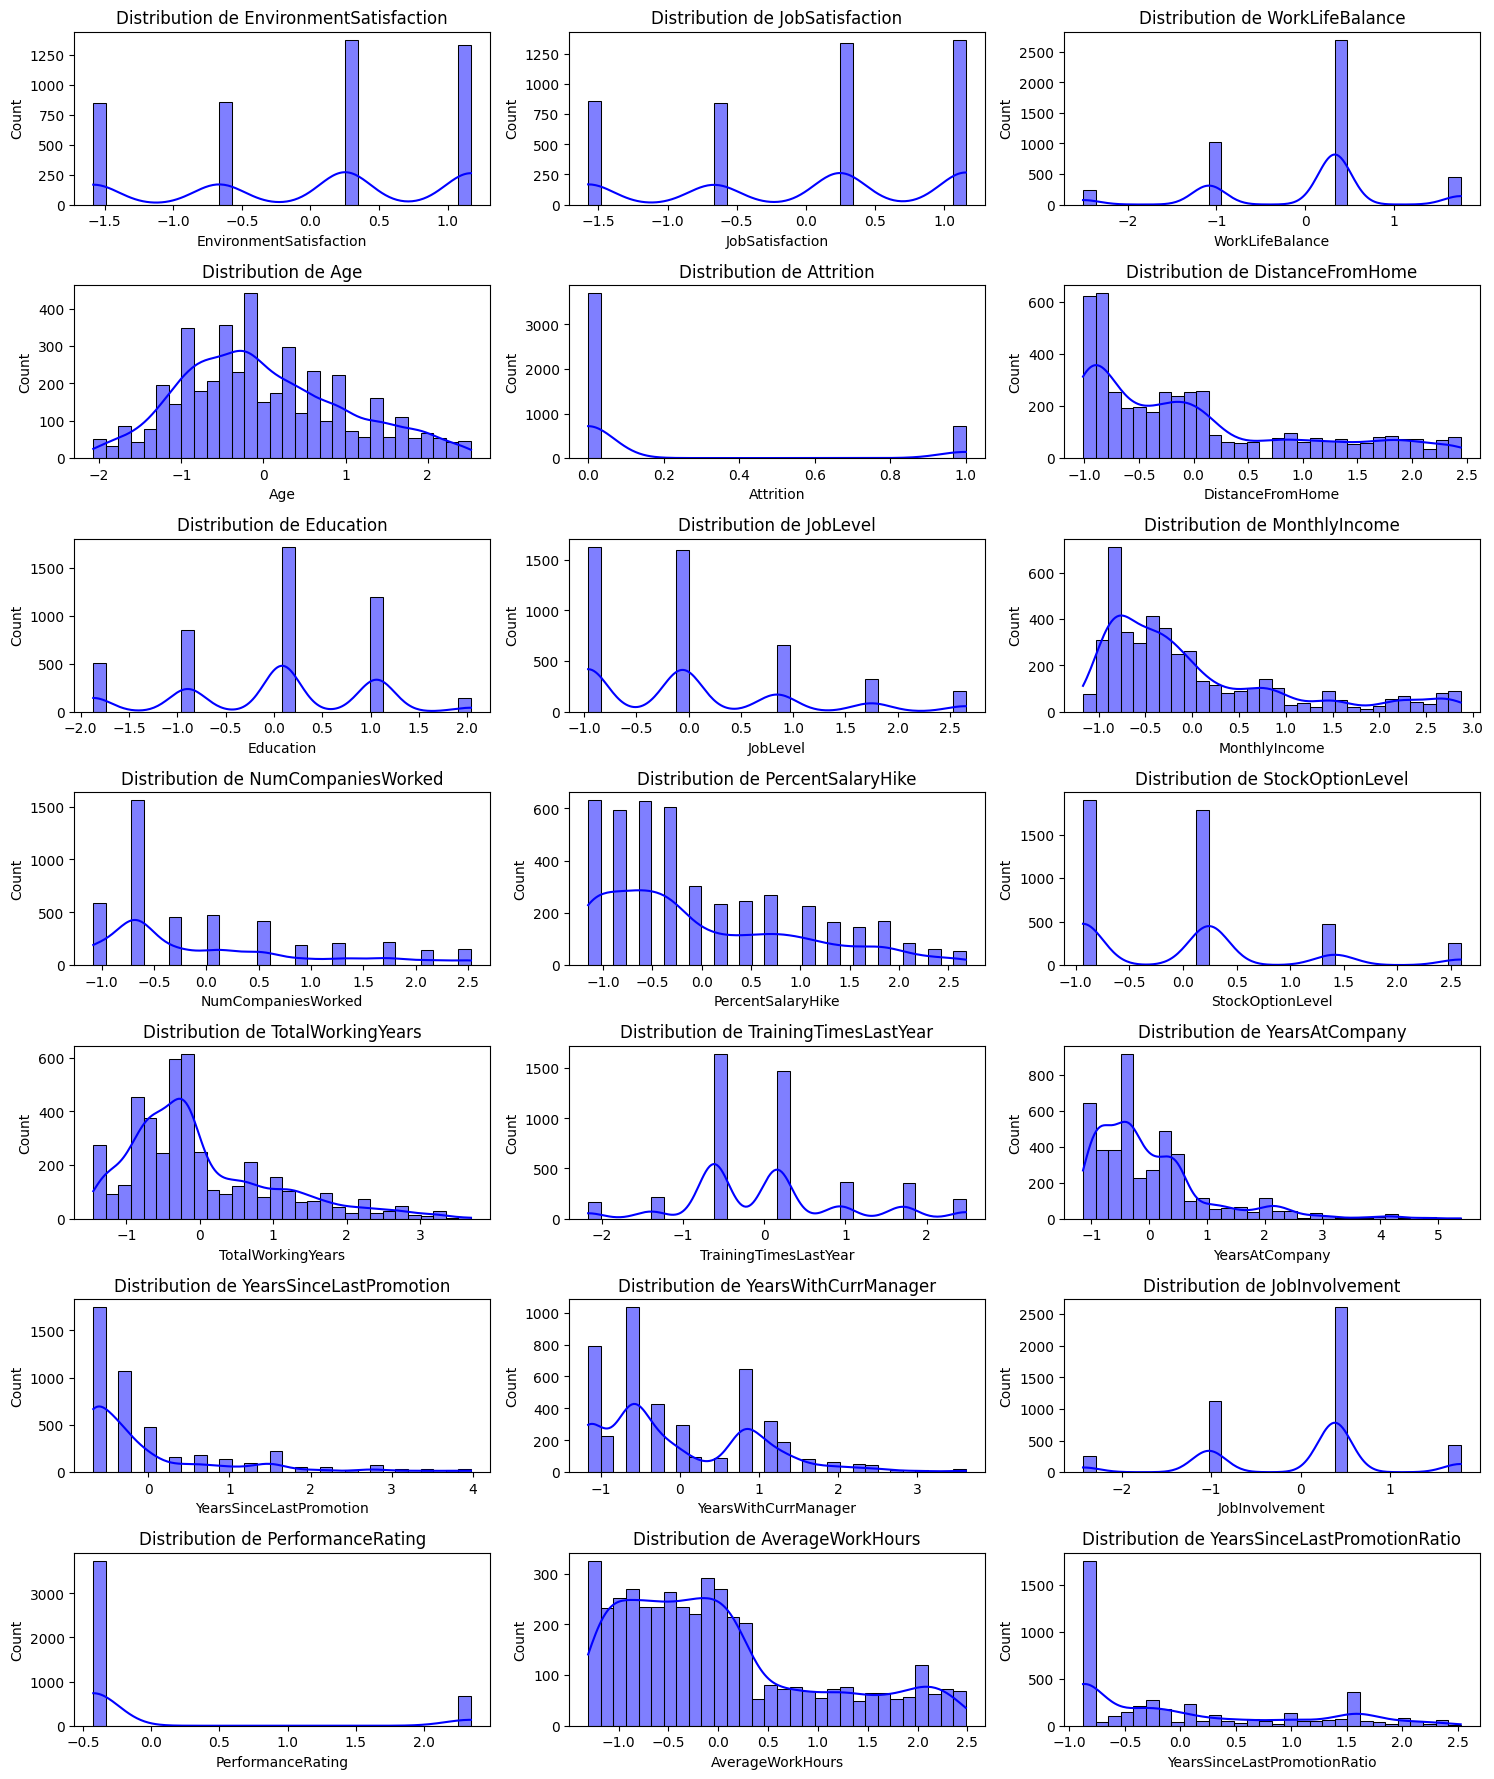

In [18]:
# Sélection des colonnes numériques
numerical_columns = df_prepared.select_dtypes(include=["number"]).columns

# Création des histogrammes
plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i)
    sns.histplot(df_prepared[col], bins=30, kde=True, color="blue")
    plt.title(f"Distribution de {col}")
plt.tight_layout()
plt.show()

### 3. Matrice de Corrélation
Pour explorer les relations entre les variables numériques, nous utilisons une matrice de corrélation et une heatmap.

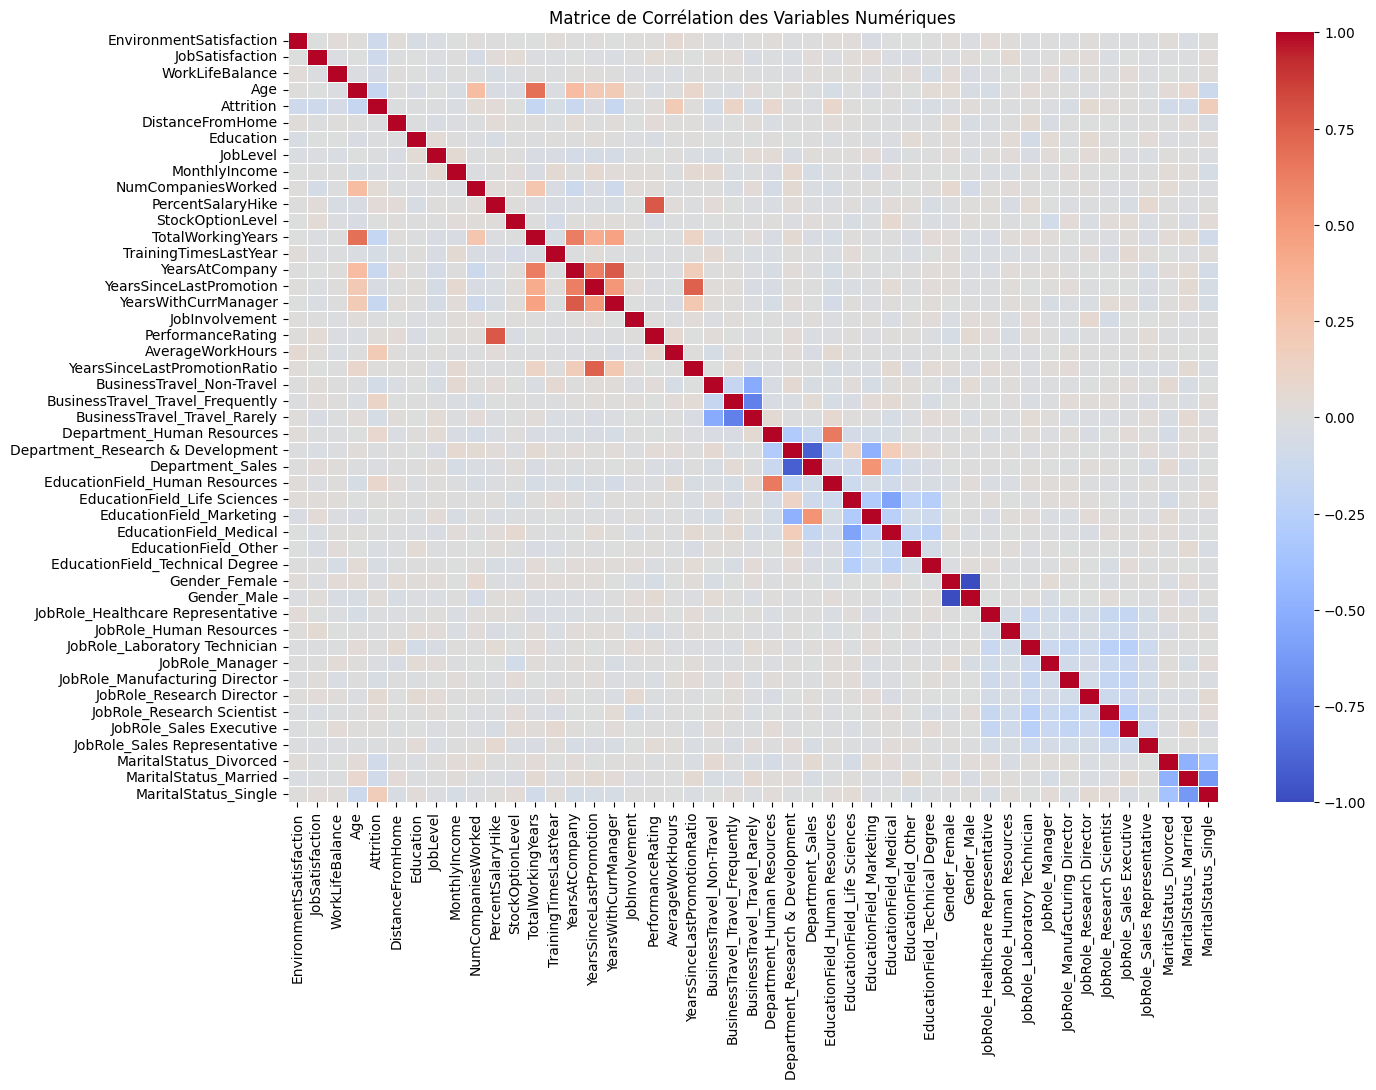

In [19]:
corr_matrix = df_prepared.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Matrice de Corrélation des Variables Numériques')
plt.show()

### 4. Visualisation des Relations entre les Variables
Nous allons créer quelques graphes de dispersion pour visualiser les relations entre certaines variables clés.

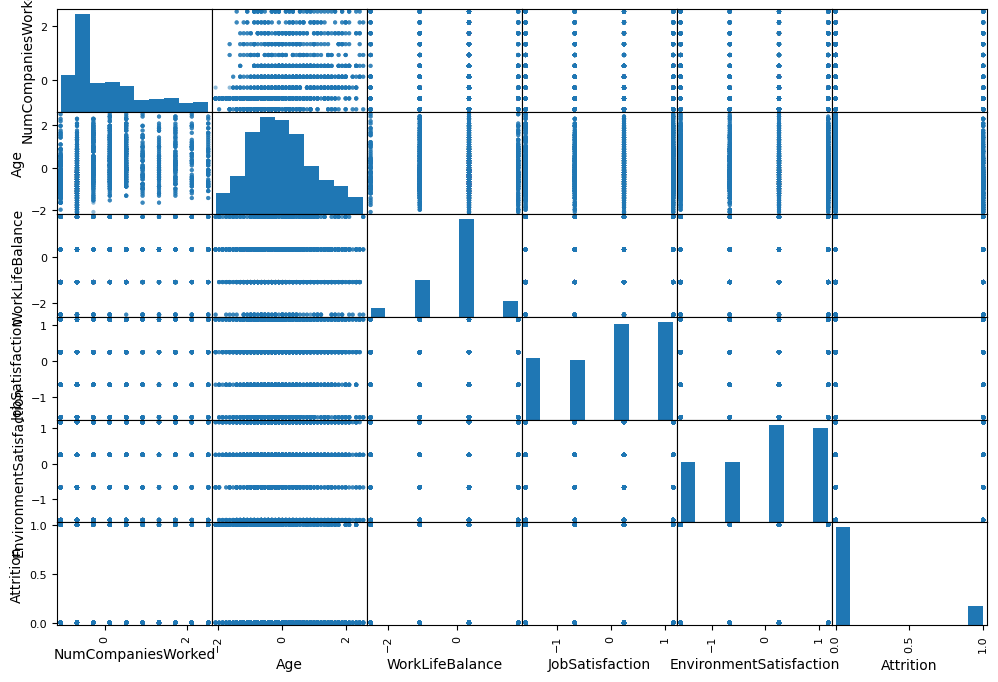

In [ ]:
attributes = ["NumCompaniesWorked", "Age", "WorkLifeBalance", "JobSatisfaction", "EnvironmentSatisfaction", "Attrition"]
scatter_matrix = pd.plotting.scatter_matrix(df_prepared[attributes], figsize=(12, 8))
plt.show()

### 5. Analyse de la Variable Cible
Analysons la variable cible Attrition pour voir comment elle est distribuée.

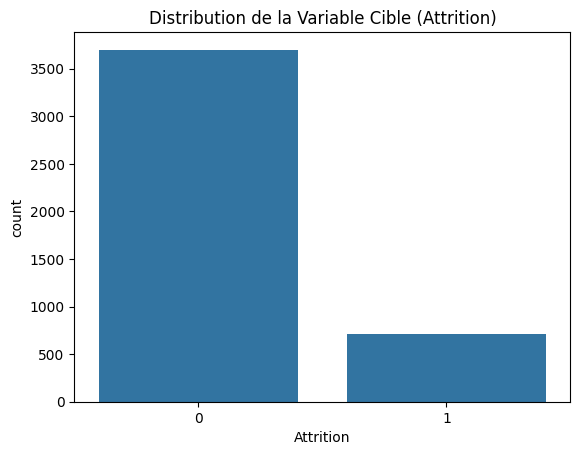

In [ ]:
sns.countplot(x='Attrition', data=df_prepared)
plt.title('Distribution de la Variable Cible (Attrition)')
plt.show()

### Analyse de la Variable Cible : Attrition

#### Distribution de la variable

Le graphique ci-dessus représente la **répartition des employés** en fonction de la variable **Attrition**. Cette variable indique si un employé a quitté l’entreprise (`1`) ou est resté (`0`).

#### Interprétation des résultats

1. **Forte majorité des employés restent**  
   - La grande majorité des employés ont une valeur `0`, ce qui signifie qu’ils sont restés dans l’entreprise.  
   - Une proportion plus faible des employés ont une valeur `1`, indiquant qu’ils ont quitté l’entreprise.

2. **Déséquilibre des classes**  
   - On constate un **déséquilibre** important entre les employés qui restent et ceux qui partent.  
   - Ce déséquilibre peut impacter l’analyse, notamment pour la construction d’un modèle prédictif, car une prédiction naïve pourrait toujours privilégier la classe majoritaire (`0` = reste).


### 6. Relations entre les Variables et la Cible
Examinons comment certaines variables influencent la probabilité de vendre un bien immobilier dans les 6 mois.

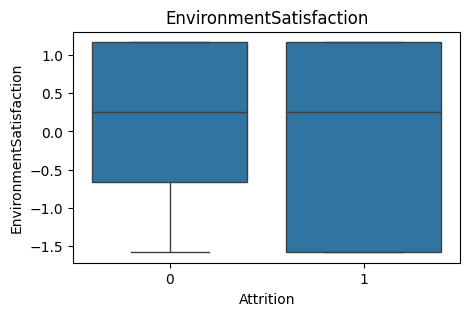

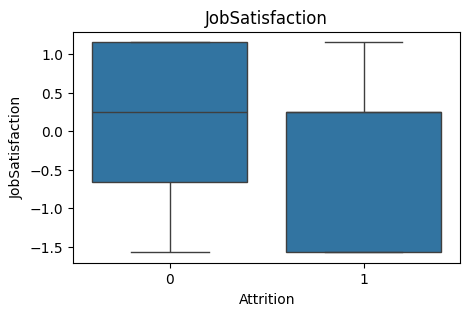

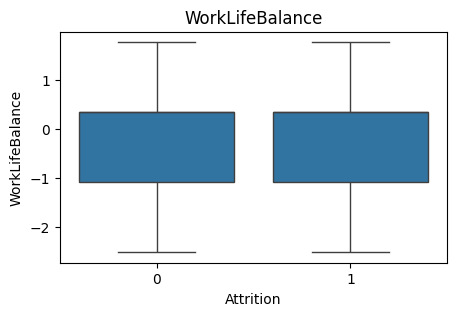

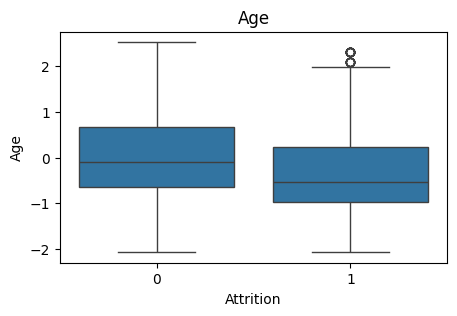

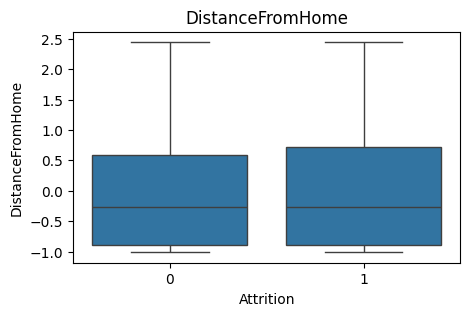

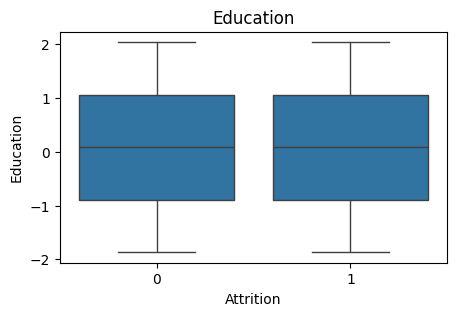

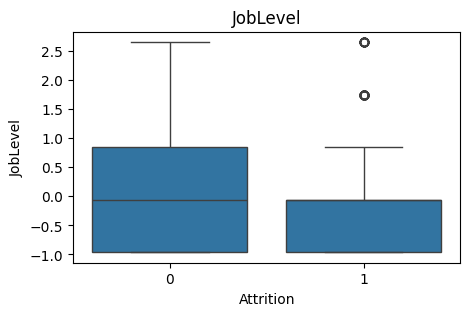

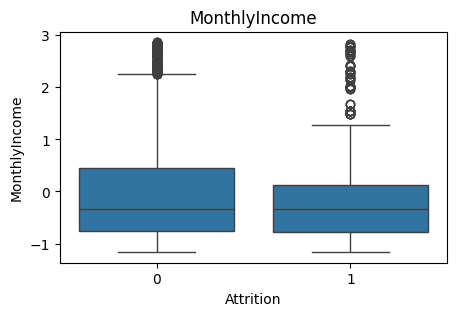

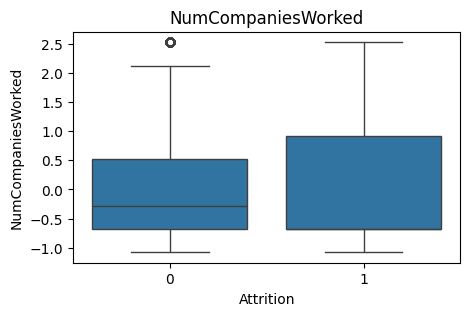

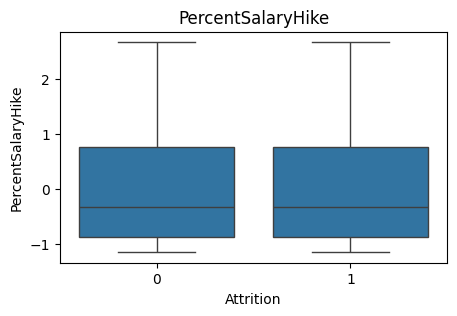

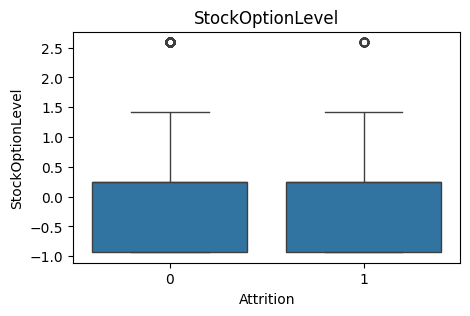

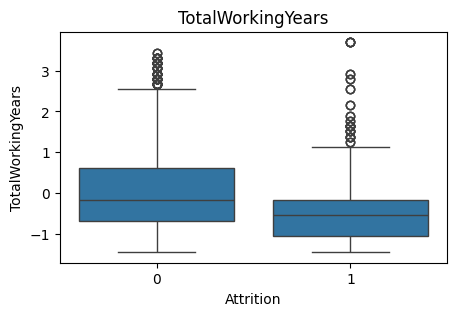

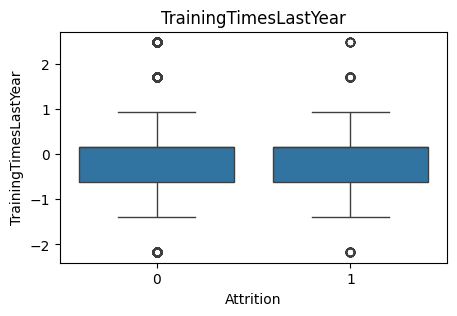

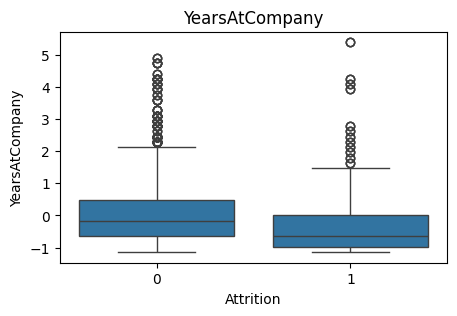

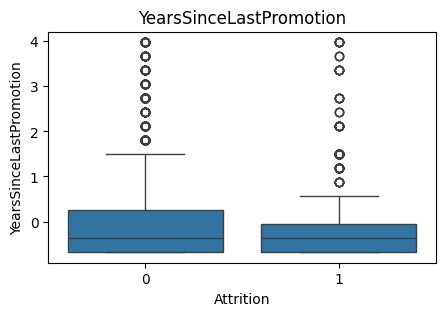

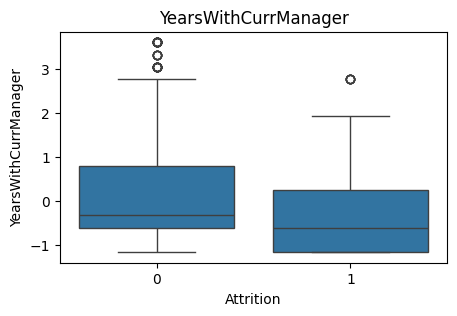

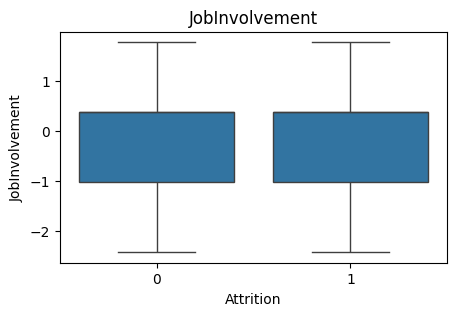

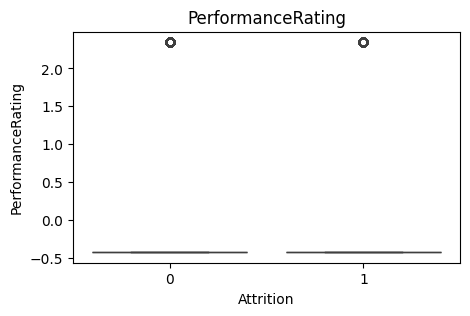

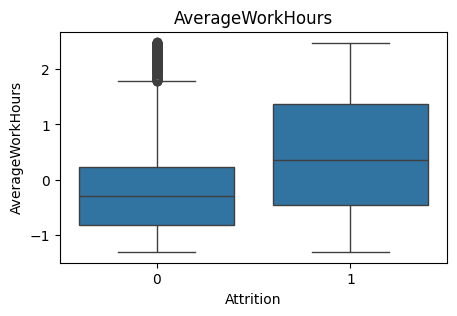

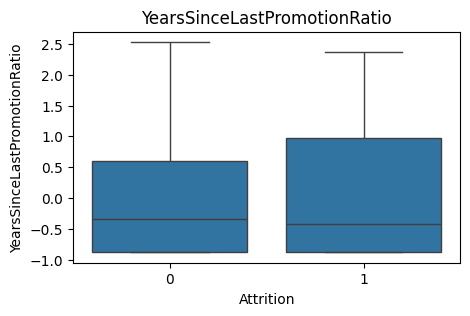

In [21]:
for columns in df_prepared.select_dtypes(np.number).columns:
    if columns == 'EmployeeID' or columns == 'Attrition':
        continue
    plt.figure(figsize=(5, 3))
    sns.boxplot(x='Attrition', y=columns, data=df_prepared)
    plt.title(columns)
    plt.show()

## 6. Modèles de Classification

### Objectif

L'objectif de cette section est de construire et d'évaluer des modèles permettant de **prédire si un employé quittera l’entreprise (Attrition = 1) ou restera (Attrition = 0)**. 

Étant donné que nous avons un **déséquilibre des classes** (beaucoup plus d’employés restent que de départs), nous devons choisir des modèles adaptés à cette situation.


### Choix des Modèles

Nous avons sélectionné deux modèles de classification :
1. **Régression Logistique**
2. **Random Forest**

#### 1. Régression Logistique

##### Pourquoi ce choix ?
- Modèle simple, rapide à entraîner et facile à comprendre.
- Permet d’identifier les **facteurs influençant le départ** des employés.
- Adapté aux **problèmes de classification binaire** (`Attrition = 0 ou 1`).

##### Limites :
- Hypothèse de **relation linéaire** entre les variables explicatives et l’attrition.
- Moins efficace sur des relations **complexes et non linéaires**.

#### 2. Random Forest

##### Pourquoi ce choix ?
- Modèle basé sur plusieurs **arbres de décision**, ce qui le rend plus robuste.
- Capable de gérer des relations **complexes et non linéaires**.
- Fournit une **importance des variables**, aidant à comprendre les facteurs liés à l’attrition.

##### Limites :
- Moins facile à interpréter qu’une régression logistique.
- Peut être plus lent si le volume de données est important.


### Rappel des Principales Métriques de Performance

Pour comparer les modèles, nous utiliserons plusieurs **indicateurs de performance** :

- **Précision globale** : Pourcentage de prédictions correctes sur l’ensemble des employés.
- **Précision (Precision)** : Mesure la proportion des employés que le modèle a bien identifiés comme quittant réellement l’entreprise.
- **Rappel (Recall)** : Mesure la capacité du modèle à détecter les employés qui quittent réellement l’entreprise.
- **F1-Score** : Moyenne entre la précision et le rappel, utile quand les classes sont déséquilibrées.

Un bon modèle doit avoir un **F1-Score élevé**, surtout pour la classe "Attrition = 1" afin de bien identifier les départs.


### Matrice de Confusion

Un outil permettant de voir comment le modèle classe les employés :

|   | Prédit Partir | Prédit Rester |
|---|--------------|--------------|
| **Réalité : Partir** | Correct (VP) | Manqué (FN) |
| **Réalité : Rester** | Faux positif (FP) | Correct (VN) |

- **VP (Vraies Positives)** : Employés qui partent bien détectés.
- **FP (Faux Positifs)** : Employés prévus comme partants mais qui restent.
- **FN (Faux Négatifs)** : Employés qui quittent l’entreprise mais que le modèle ne détecte pas.
- **VN (Vraies Négatives)** : Employés qui restent bien détectés.

Un bon modèle doit minimiser les **faux négatifs** pour ne pas manquer les employés susceptibles de partir.


### AUC et Courbe ROC

#### Courbe ROC
Permet d’évaluer la capacité du modèle à distinguer les employés qui restent de ceux qui partent.

#### AUC (Aire sous la courbe)
- Plus l’AUC est proche de **1**, meilleur est le modèle.
- Une AUC de **0.5** signifie que le modèle ne fait pas mieux qu’un choix aléatoire.

| AUC | Interprétation |
|------|--------------|
| 0.9 - 1.0 | Excellente performance |
| 0.8 - 0.9 | Bonne performance |
| 0.7 - 0.8 | Acceptable |
| 0.6 - 0.7 | Faible performance |
| 0.5 - 0.6 | Mauvaise performance |





## Application des modèles
### 0. Préparation des données d'apprentissage et de test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1323 entries, 3662 to 4
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   EnvironmentSatisfaction            1323 non-null   float64
 1   JobSatisfaction                    1323 non-null   float64
 2   WorkLifeBalance                    1323 non-null   float64
 3   Age                                1323 non-null   float64
 4   DistanceFromHome                   1323 non-null   float64
 5   Education                          1323 non-null   float64
 6   JobLevel                           1323 non-null   float64
 7   MonthlyIncome                      1323 non-null   float64
 8   NumCompaniesWorked                 1323 non-null   float64
 9   PercentSalaryHike                  1323 non-null   float64
 10  StockOptionLevel                   1323 non-null   float64
 11  TotalWorkingYears                  1323 non-null   float64
 1

### 1. Régression Logistique

La régression logistique est une technique statistique utilisée pour modéliser la probabilité qu'un événement binaire (avec deux issues possibles) se produise. Contrairement à la régression linéaire, qui prédit une valeur continue, la régression logistique prédit la probabilité d'une occurrence d'un événement.

#### Formulation Mathématique

La régression logistique utilise la fonction logistique ou sigmoïde pour transformer la sortie de la régression linéaire en une probabilité.

La fonction logistique est définie comme suit :
$\sigma(z) = \frac{1}{1 + e^{-z}}$

En régression logistique, \( z \) est une combinaison linéaire des caractéristiques :
$z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n$

Où :
- $\beta_0$ est l'ordonnée à l'origine (intercept)
- $\beta_1, \beta_2, \ldots, \beta_n$ sont les coefficients des caractéristiques $x_1, x_2, \ldots, x_n $

La probabilité que l'événement se produise (par exemple, \( y = 1 \)) est alors donnée par :
$P(y=1|x) = \sigma(z) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n)}}$

#### Fonction de Coût

La fonction de coût utilisée pour ajuster les paramètres de la régression logistique est la log-vraisemblance, définie comme suit :
$J(\beta) = - \frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right] $

Où :
- $m$ est le nombre d'échantillons
- $y^{(i)}$ est la valeur réelle pour l'échantillon $i$
- $\hat{y}^{(i)}$ est la probabilité prédite pour l'échantillon $i$

#### Entraînement du Modèle

L'entraînement du modèle de régression logistique consiste à trouver les paramètres $\beta$ qui minimisent la fonction de coût. Ceci est généralement fait à l'aide de l'algorithme de descente de gradient.

Matrice de Confusion (Régression Logistique) :
 [[1078   32]
 [ 158   55]]
Rapport de Classification (Régression Logistique) :
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1110
           1       0.63      0.26      0.37       213

    accuracy                           0.86      1323
   macro avg       0.75      0.61      0.64      1323
weighted avg       0.83      0.86      0.83      1323

AUC-ROC (Régression Logistique) :
 0.6146935668062429


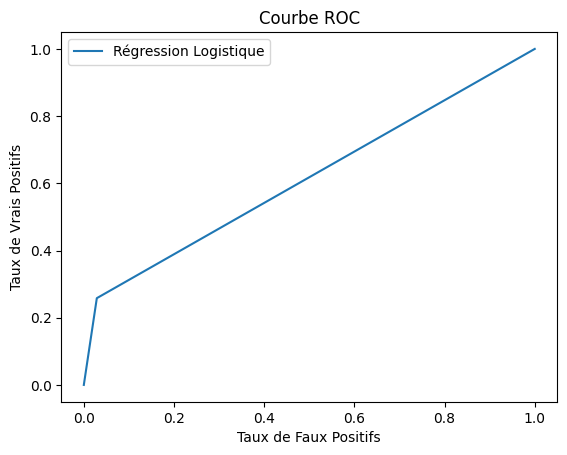

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# Initialisation et entraînement du modèle
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

# Prédictions
y_pred_log_reg = log_reg.predict(X_test)

# Matrice de confusion
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print("Matrice de Confusion (Régression Logistique) :\n", conf_matrix_log_reg)

# Rapport de classification
class_report_log_reg = classification_report(y_test, y_pred_log_reg)
print("Rapport de Classification (Régression Logistique) :\n", class_report_log_reg)

# AUC-ROC
roc_auc_log_reg = roc_auc_score(y_test, y_pred_log_reg)
print("AUC-ROC (Régression Logistique) :\n", roc_auc_log_reg)

# Courbe ROC
fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(y_test, y_pred_log_reg)
plt.plot(fpr_log_reg, tpr_log_reg, label="Régression Logistique")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC")
plt.legend()
plt.show()

## Analyse des Résultats de la Régression Logistique

### Matrice de Confusion

La matrice de confusion montre les prédictions du modèle par rapport aux valeurs réelles :

|   | Prédit Partir | Prédit Rester |
|---|--------------|--------------|
| **Réalité : Partir** | 55 (Vrais Positifs) | 158 (Faux Négatifs) |
| **Réalité : Rester** | 32 (Faux Positifs) | 1078 (Vrais Négatifs) |

- **Les faux négatifs (158)** sont élevés, ce qui signifie que le modèle ne détecte pas bien certains employés qui quittent l’entreprise.
- **Les faux positifs (32)** sont plus faibles, ce qui montre que le modèle ne fait pas beaucoup d’erreurs en prédisant qu’un employé va partir alors qu’il reste.

## Rapport de Classification

### Interprétation des métriques :
- **Précision (Precision) pour la classe 1 (Attrition = 1) : 63%**  
  → Parmi les employés prédits comme quittant l'entreprise, 63% l'ont réellement quittée.
- **Rappel (Recall) pour la classe 1 : 26%**  
  → Seulement 26% des employés ayant réellement quitté l'entreprise ont été correctement détectés par le modèle.
- **F1-score pour la classe 1 : 37%**  
  → Ce score montre que l’équilibre entre la précision et le rappel est faible pour détecter les départs.
- **Précision globale (Accuracy) : 86%**  
  → La majorité des prédictions sont correctes, mais cette métrique est influencée par le fait que la plupart des employés restent (déséquilibre des classes).
- **Macro Average (0.64) et Weighted Average (0.83)**  
  → Le modèle favorise fortement la classe majoritaire (`Attrition = 0`).

## Courbe ROC et AUC

- **AUC-ROC = 0.61**, ce qui est proche de 0.5, indiquant une **performance moyenne**.
- La courbe ROC montre une faible séparation entre les employés qui partent et ceux qui restent.
- Un AUC supérieur à **0.8** serait considéré comme un bon modèle, ici, **0.61 est faible**.

### Améliorations Possibles

### 1. Performance moyenne du modèle :
- Le modèle **prédit bien les employés qui restent**, mais **manque beaucoup d’employés qui quittent l’entreprise**.
- Le rappel (26%) est trop bas, ce qui signifie que de nombreux départs ne sont pas détectés.

### 2. Besoin d’optimisation :
- **Optimisation des hyperparamètres** avec **Grid Search** pour améliorer la performance.
- **Prise en compte du déséquilibre des classes** avec une **pondération des classes** (`class_weight='balanced'`).

Le modèle actuel donne une première base d’analyse, mais il est nécessaire d'optimiser ses paramètres pour améliorer la détection des employés qui risquent de quitter l’entreprise.


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Parameters: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
Matrice de Confusion (Régression Logistique) :
 [[839 271]
 [ 55 158]]
Rapport de Classification (Régression Logistique) :
               precision    recall  f1-score   support

           0       0.94      0.76      0.84      1110
           1       0.37      0.74      0.49       213

    accuracy                           0.75      1323
   macro avg       0.65      0.75      0.66      1323
weighted avg       0.85      0.75      0.78      1323

AUC-ROC (Régression Logistique) :
 0.7488199467072707


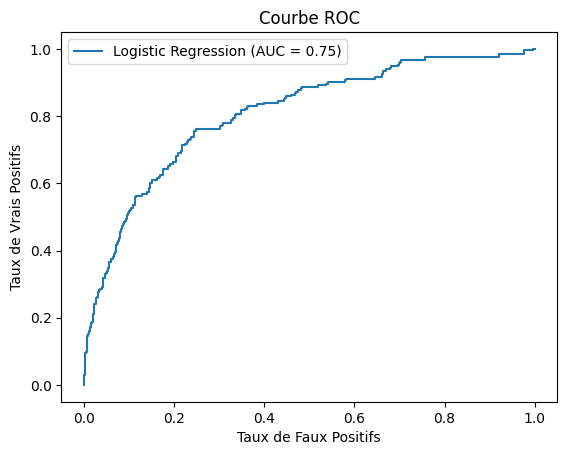

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Define parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],           # Regularization strength
    'penalty': ['l1', 'l2'],                # Regularization type
    'solver': ['liblinear', 'saga'],        # Optimization algorithm
    'class_weight': [None, 'balanced']      # Handle class imbalance
}

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=500)

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Display the best parameters and score
print("Best Parameters:", grid_search.best_params_)
#print("Best AUC-ROC Score from GridSearchCV:", grid_search.best_score_)

# Use the best model from Grid Search
best_log_reg = grid_search.best_estimator_

# Make predictions
y_pred_log_reg = best_log_reg.predict(X_test)

# Evaluate the model
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
class_report_log_reg = classification_report(y_test, y_pred_log_reg)
roc_auc_log_reg = roc_auc_score(y_test, y_pred_log_reg)

print("Matrice de Confusion (Régression Logistique) :\n", conf_matrix_log_reg)
print("Rapport de Classification (Régression Logistique) :\n", class_report_log_reg)
print("AUC-ROC (Régression Logistique) :\n", roc_auc_log_reg)

# Plot ROC Curve
y_proba_log_reg = best_log_reg.predict_proba(X_test)[:, 1]  # Predicted probabilities
fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(y_test, y_proba_log_reg)

plt.figure()
plt.plot(fpr_log_reg, tpr_log_reg, label=f"Logistic Regression (AUC = {roc_auc_log_reg:.2f})")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC")
plt.legend()
plt.show()



Nous avons optimisé la régression logistique en ajustant les **hyperparamètres** (`C`, `penalty`, `solver`, `class_weight`).  
Les meilleurs paramètres trouvés sont :  
- `C = 0.1` (régularisation)
- `penalty = l2`
- `solver = liblinear`
- `class_weight = balanced` (prise en compte du déséquilibre des classes)


### Résultats Clés

| **Métrique** | **Avant Optimisation** | **Après Optimisation** |
|-------------|--------------------|--------------------|
| **Rappel (Recall) - Attrition** | 26% | **74%** ✅ |
| **Précision (Precision) - Attrition** | 63% | **37%** ⚠️ |
| **F1-Score - Attrition** | 37% | **49%** ✅ |
| **Accuracy (Précision globale)** | 86% | **75%** ⚠️ |
| **AUC-ROC** | 0.61 | **0.75** ✅ |

- **Meilleure détection des employés qui quittent l’entreprise** (+48% de rappel).
- **Hausse des faux positifs** (prédit à tort des départs).
- **Légère baisse de la précision globale**, mais amélioration du F1-score.


### Recommandations

- L’optimisation **améliore nettement la détection des départs**.
- **Compromis** entre meilleure détection et risque de fausses alertes.
- Tester **Random Forest** pour voir si un autre modèle donne de meilleurs résultats.
- Ajuster le **seuil de décision** pour un meilleur équilibre entre rappel et précision.

L’optimisation a **renforcé la pertinence du modèle**, mais d'autres améliorations sont encore possibles.


### 2. Random Forest

Les forêts aléatoires sont une méthode d'ensemble puissante et flexible utilisée pour les tâches de classification et de régression. Elles combinent plusieurs arbres de décision pour améliorer les performances prédictives et réduire les risques de surapprentissage.

#### Principe de Fonctionnement

Une forêt aléatoire est constituée de nombreux arbres de décision indépendants, chacun construit sur un échantillon aléatoire des données d'entraînement et utilisant un sous-ensemble aléatoire des caractéristiques pour chaque division de l'arbre. Les prédictions de tous les arbres sont ensuite combinées pour produire une seule prédiction finale.

#### Construction de la Forêt Aléatoire

1. **Échantillonnage Bootstrap** : Pour chaque arbre de la forêt, un échantillon aléatoire avec remplacement (bootstrap) des données d'entraînement est créé. Cela signifie que certains exemples peuvent être sélectionnés plusieurs fois, tandis que d'autres peuvent ne pas être sélectionnés du tout.
2. **Sélection de Sous-ensembles de Caractéristiques** : À chaque nœud de chaque arbre, un sous-ensemble aléatoire des caractéristiques est sélectionné. L'arbre choisit la meilleure division parmi ce sous-ensemble de caractéristiques.
3. **Construction des Arbres** : Les arbres de décision sont construits jusqu'à leur complétion sans élagage. Cela permet à chaque arbre de capturer des modèles complexes dans les données.
4. **Agrégation des Prédictions** : Pour la classification, chaque arbre vote pour une classe, et la classe avec le plus de votes est choisie comme prédiction finale (majority voting). Pour la régression, la moyenne des prédictions de tous les arbres est utilisée.

#### Avantages et Inconvénients

##### Avantages :
- **Réduction du Surapprentissage** : En combinant les prédictions de plusieurs arbres, les forêts aléatoires réduisent le risque de surapprentissage par rapport aux arbres de décision individuels.
- **Robustesse** : Insensibles aux variations dans les données d'entraînement. Les forêts aléatoires sont moins sensibles aux fluctuations dans les données d'entraînement.
- **Gestion des Caractéristiques** : Capables de gérer un grand nombre de caractéristiques et de déterminer les plus importantes.
- **Manipulation des Données Manquantes** : Peuvent gérer des valeurs manquantes en imputant des valeurs basées sur les arbres de la forêt.

##### Inconvénients :
- **Complexité et Temps de Calcul** : Les forêts aléatoires nécessitent plus de temps de calcul et de mémoire par rapport aux arbres de décision individuels, surtout lorsque le nombre d'arbres est élevé.
- **Interprétabilité** : Moins interprétables que les arbres de décision individuels en raison de la combinaison de nombreux arbres.

#### Applications

- **Classification** : Utilisées pour des tâches de classification dans divers domaines comme la finance, la médecine et le marketing.
- **Régression** : Prédiction de valeurs continues dans des contextes tels que la prévision des prix de l'immobilier et la prédiction des ventes.
- **Sélection de Caractéristiques** : Identification des caractéristiques les plus importantes pour la prédiction.

Les forêts aléatoires sont un outil puissant pour améliorer les performances prédictives et la robustesse des modèles de décision, en combinant la force de multiples arbres de décision tout en atténuant leurs faiblesses individuelles.

Matrice de Confusion (Random Forest) :
 [[1107    3]
 [  16  197]]
Rapport de Classification (Random Forest) :
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1110
           1       0.98      0.92      0.95       213

    accuracy                           0.99      1323
   macro avg       0.99      0.96      0.97      1323
weighted avg       0.99      0.99      0.99      1323

AUC-ROC (Random Forest) :
 0.9610899632026394


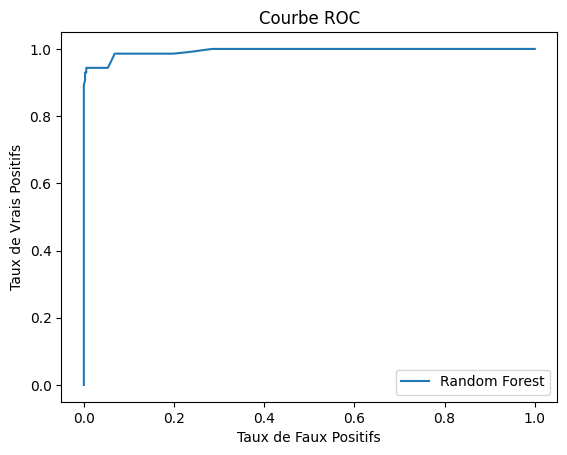

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialisation et entraînement du modèle
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prédictions
y_pred_rf = rf_model.predict(X_test)

# Matrice de confusion
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Matrice de Confusion (Random Forest) :\n", conf_matrix_rf)

# Rapport de classification
class_report_rf = classification_report(y_test, y_pred_rf)
print("Rapport de Classification (Random Forest) :\n", class_report_rf)

# AUC-ROC
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
print("AUC-ROC (Random Forest) :\n", roc_auc_rf)

# Courbe ROC
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_proba_rf)
plt.figure()
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC")
plt.legend()
plt.show()

- **1107 vrais négatifs (TN)** : Correctement classés comme ne quittant pas.
- **3 faux positifs (FP)** : Prédits à tort comme quittant l’entreprise.
- **16 faux négatifs (FN)** : Départs réels non détectés.
- **197 vrais positifs (TP)** : Départs correctement identifiés.


### 📈 Rapport de Classification
| Classe | Précision | Rappel | F1-Score | Support |
|--------|-----------|--------|----------|---------|
| **0 (Reste)** | 0.99 | 1.00 | 0.99 | 1110 |
| **1 (Quitte)** | 0.98 | 0.92 | 0.95 | 213 |
| **Global (Accuracy)** | **0.99** | - | - | 1323 |

🔹 **Précision élevée (0.98) et bon rappel (0.92) pour les départs**.  
🔹 **F1-score de 0.95**, prouvant un bon équilibre entre rappel et précision.  
🔹 **Accuracy de 99%**, signalant une excellente performance générale.


### 📊 AUC-ROC
0.96

✅ **Très bon score**, indiquant une capacité élevée à différencier les employés qui quittent de ceux qui restent.


✅ **Modèle performant**, avec **peu de faux positifs et négatifs**.  
⚠️ **Possibilité d’améliorer encore le rappel**, pour mieux détecter les départs.  
🛠️ **Ajuster le seuil de décision** pourrait optimiser le compromis entre rappel et précision.


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


c:\Users\hamza\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'class_weight': 'balanced', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best AUC-ROC Score from GridSearchCV: 0.9844240607006565
Matrice de Confusion (Random Forest) :
 [[1110    0]
 [  15  198]]
Rapport de Classification (Random Forest) :
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1110
           1       1.00      0.93      0.96       213

    accuracy                           0.99      1323
   macro avg       0.99      0.96      0.98      1323
weighted avg       0.99      0.99      0.99      1323

AUC-ROC (Random Forest) :
 0.9647887323943662


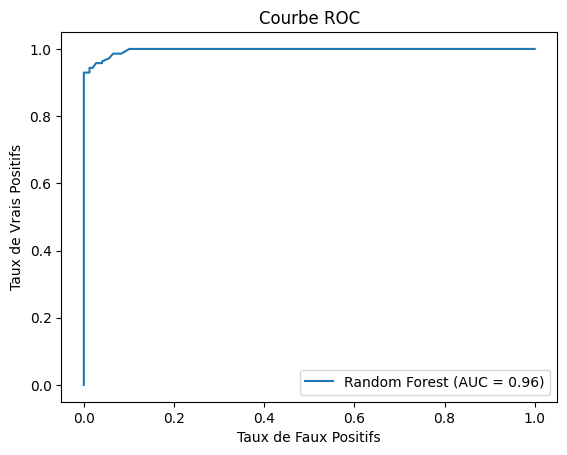

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],       # Number of trees in the forest
    'max_depth': [10, 20, 30, None],     # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],     # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],       # Minimum samples required at a leaf node
    'class_weight': [None, 'balanced']   # Handle class imbalance
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Display the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best AUC-ROC Score from GridSearchCV:", grid_search.best_score_)

# Use the best model from Grid Search
best_rf_model = grid_search.best_estimator_

# Make predictions
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the model
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

print("Matrice de Confusion (Random Forest) :\n", conf_matrix_rf)
print("Rapport de Classification (Random Forest) :\n", class_report_rf)
print("AUC-ROC (Random Forest) :\n", roc_auc_rf)

# Plot ROC Curve
y_proba_rf = best_rf_model.predict_proba(X_test)[:, 1]  # Predicted probabilities
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_proba_rf)

plt.figure()
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC")
plt.legend()
plt.show()

### 🔍 Optimisation du Random Forest

✅ Meilleurs Paramètres
{'class_weight': 'balanced', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

✔️ **Meilleure gestion du déséquilibre des classes**  
✔️ **Profondeur et nombre d’arbres optimisés**  

### 📊 Résultats Clés  
- **Matrice de confusion** : **15 faux négatifs, 0 faux positifs** → Très précis.  
- **Précision (1.00) et rappel (0.93) sur les départs** → Excellente détection.  
- **AUC-ROC = 0.96** → Très bonne séparation des classes.  

✅ **Optimisation réussie**, détection des départs fiable.  
⚠️ **Encore quelques faux négatifs**, seuil ajustable si nécessaire.  

### Bonus:

In [ ]:
import shap
# Initialize SHAP explainer
explainer = shap.TreeExplainer(rf_model)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Show first 5 explanations for the first class
shap_values[0][:5]

array([[ 0.00192325, -0.00192325],
       [ 0.02370521, -0.02370521],
       [-0.0002044 ,  0.0002044 ],
       [-0.06565002,  0.06565002],
       [-0.00975828,  0.00975828]])

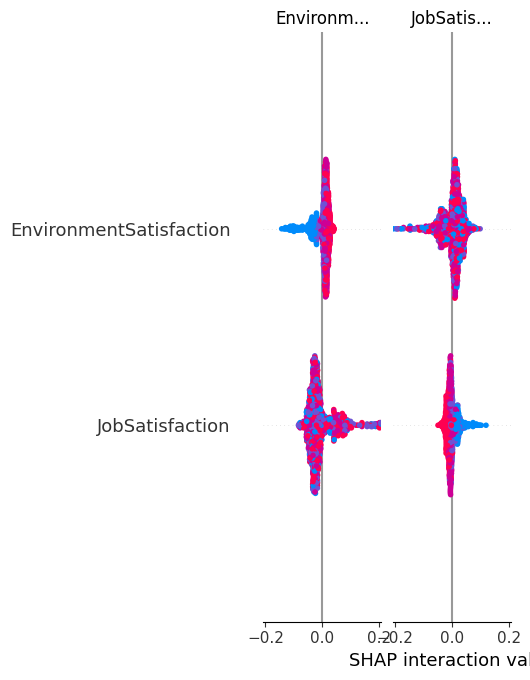

In [ ]:
shap.summary_plot(shap_values, X_test)

# Etude comparative entre les modèles

On va évaluer plusieurs algorithmes de classification pour identifier le modèle le plus performant sur notre jeu de données.  

### 📌 Modèles Testés  
- **Régressions & Perceptron** : `Perceptron`, `LogisticRegression`  
- **Méthodes à noyaux** : `SVM`  
- **Modèles basés sur les distances** : `KNN`  
- **Bayésien** : `Naive Bayes`  
- **Arbres de décision & Forêts aléatoires** : `DecisionTree`, `RandomForest`  
- **Boosting** : `GradientBoosting`, `XGBoost`  

### 🛠️ Processus  
Chaque modèle est entraîné sur `X_train, y_train` et testé sur `X_test` pour comparer leurs performances.  


In [203]:
# First, install XGBoost if needed
# !pip install xgboost

from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
# Optional: from lightgbm import LGBMClassifier

models = {
    "Perceptron": Perceptron(),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(),
    "NaiveBayes": GaussianNB(),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
    # "LightGBM": LGBMClassifier(random_state=42)  # Requires !pip install lightgbm
}

# Training and prediction remains the same
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions[name] = model.predict(X_test)

c:\Users\hamza\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:26:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [204]:
from sklearn.metrics import confusion_matrix, classification_report

# Fonction pour afficher les résultats
def display_metrics(y_test, y_pred, model_name):
   #à Compléter
   print("Modèle: ", model_name)
   # Matrice de confusion
   conf_matrix = confusion_matrix(y_test, y_pred)
   print("Matrice de Confusion :\n", conf_matrix)

   # Rapport de classification
   class_report = classification_report(y_test, y_pred)
   
   print("\nRapport de Classification :\n", class_report)

   # AUC-ROC
   roc_auc = roc_auc_score(y_test, y_pred)
   print("AUC-ROC :\n", roc_auc)

# Calcul des métriques
for name, y_pred in predictions.items():
    #à compléter
    display_metrics(y_test, y_pred, name)

Modèle:  Perceptron
Matrice de Confusion :
 [[1013   97]
 [ 169   44]]

Rapport de Classification :
               precision    recall  f1-score   support

           0       0.86      0.91      0.88      1110
           1       0.31      0.21      0.25       213

    accuracy                           0.80      1323
   macro avg       0.58      0.56      0.57      1323
weighted avg       0.77      0.80      0.78      1323

AUC-ROC :
 0.5595926912828322
Modèle:  LogisticRegression
Matrice de Confusion :
 [[1078   32]
 [ 158   55]]

Rapport de Classification :
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1110
           1       0.63      0.26      0.37       213

    accuracy                           0.86      1323
   macro avg       0.75      0.61      0.64      1323
weighted avg       0.83      0.86      0.83      1323

AUC-ROC :
 0.6146935668062429
Modèle:  SVM
Matrice de Confusion :
 [[1104    6]
 [ 112  101]]

Rapport de 

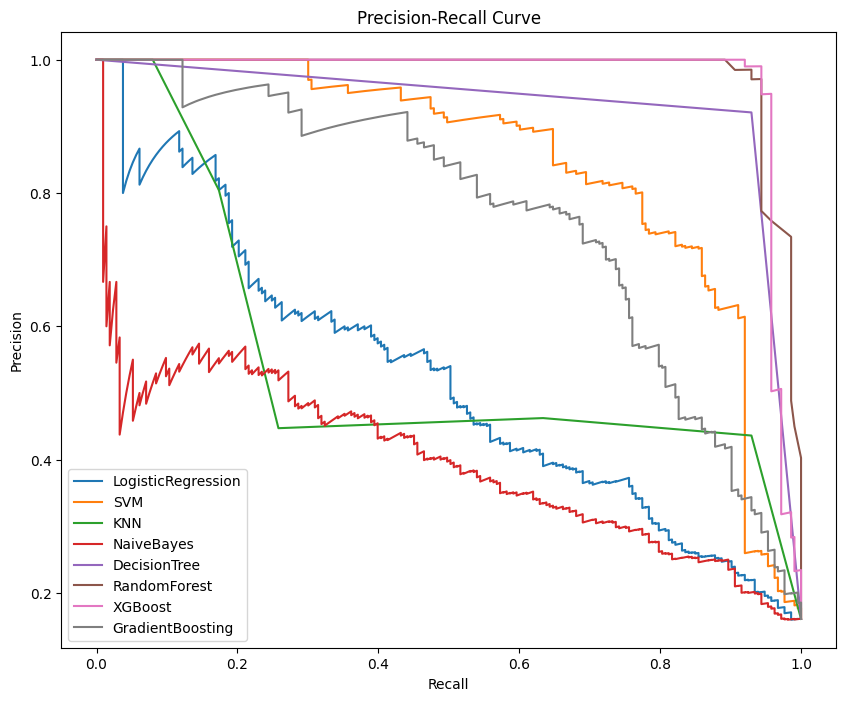

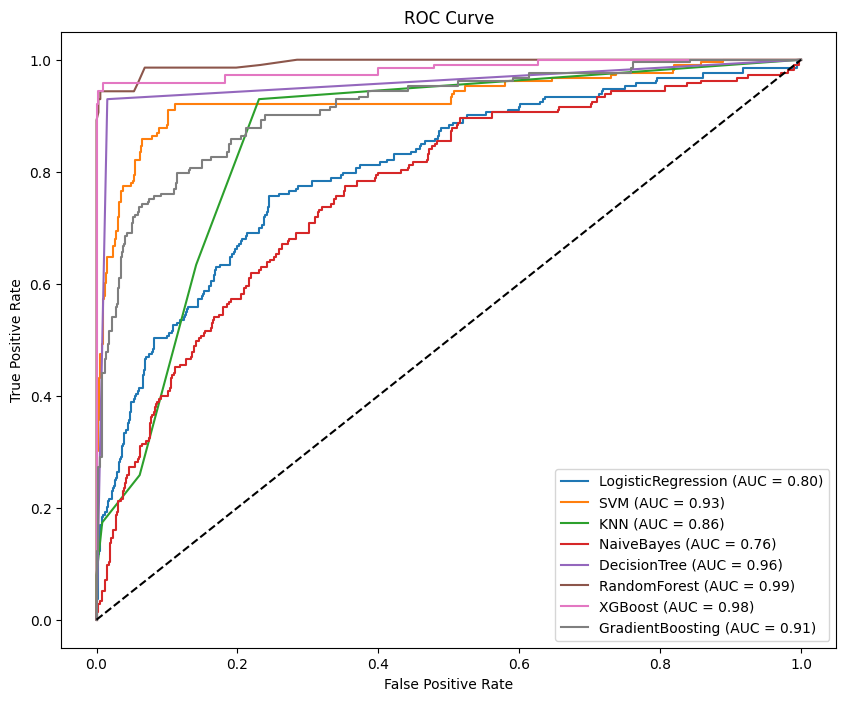

In [205]:
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

# Tracer les courbes de Précision-Rappel
plt.figure(figsize=(10, 8))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_proba)
        plt.plot(recall, precision, label=f"{name}")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Tracer les courbes ROC
plt.figure(figsize=(10, 8))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc = roc_auc_score(y_test, y_proba)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

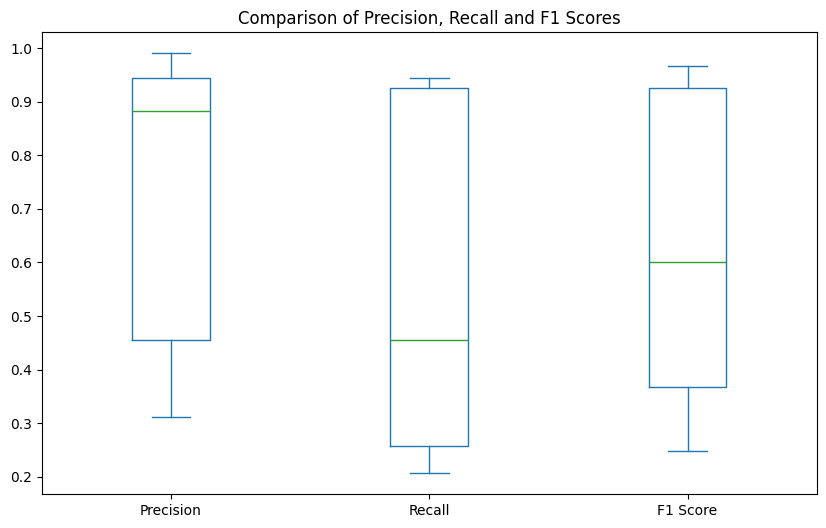

In [207]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_scores = []
recall_scores = []
f1_scores = []

for name, y_pred in predictions.items():
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    
score_df = pd.DataFrame({
    'Model': models.keys(),
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
})

score_df.plot(kind='box', figsize=(10, 6))
plt.title("Comparison of Precision, Recall and F1 Scores")
plt.show()

In [208]:
from sklearn.metrics import roc_auc_score

scores = []

for name, y_pred in predictions.items():
    y_proba = models[name].predict_proba(X_test)[:, 1] if hasattr(models[name], "predict_proba") else None
    auc_score = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    scores.append({
        'Model': name,
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'AUC': auc_score
    })

scores_df = pd.DataFrame(scores)
print(scores_df)

                Model  Precision    Recall  F1 Score       AUC
0          Perceptron   0.312057  0.206573  0.248588       NaN
1  LogisticRegression   0.632184  0.258216  0.366667  0.804035
2                 SVM   0.943925  0.474178  0.631250  0.930910
3                 KNN   0.447154  0.258216  0.327381  0.860265
4          NaiveBayes   0.456044  0.389671  0.420253  0.764514
5        DecisionTree   0.920930  0.929577  0.925234  0.957131
6        RandomForest   0.985000  0.924883  0.953995  0.993827
7             XGBoost   0.990148  0.943662  0.966346  0.983483
8    GradientBoosting   0.881818  0.455399  0.600619  0.913082


In [243]:
import time

training_times = []
prediction_times = []

for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    training_times.append(end_time-start_time)

    start_time = time.time()
    model.predict(X_test)
    end_time = time.time()
    prediction_times.append(end_time-start_time)
    
time_df = pd.DataFrame({
    'Model': models.keys(),
    'Training Time (s)': training_times,
    'Prediction Time (s)': prediction_times
})
print(time_df)


c:\Users\hamza\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:12:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


                Model  Training Time (s)  Prediction Time (s)
0          Perceptron           0.011691             0.002496
1  LogisticRegression           0.030866             0.001693
2                 SVM           1.413502             0.156763
3                 KNN           0.006305             0.082388
4          NaiveBayes           0.005235             0.002181
5        DecisionTree           0.034992             0.003192
6        RandomForest           0.496607             0.019148
7             XGBoost           0.184547             0.019862
8    GradientBoosting           0.965096             0.004607


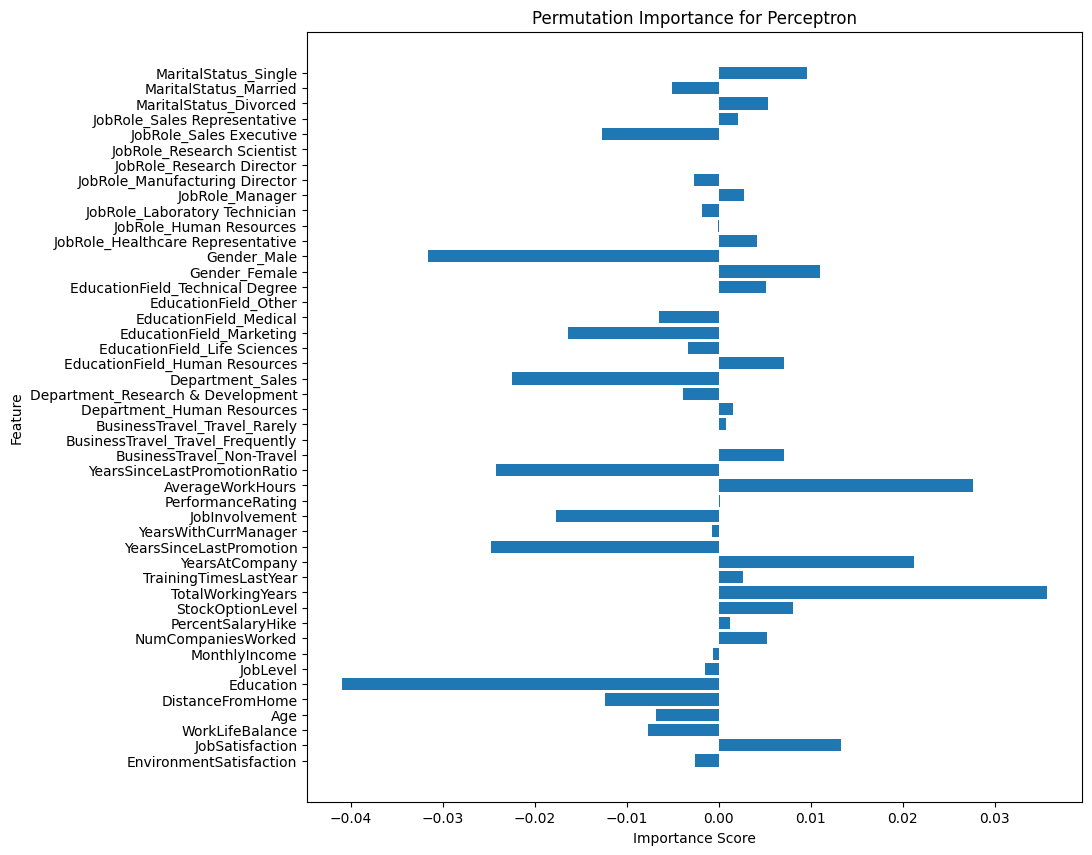

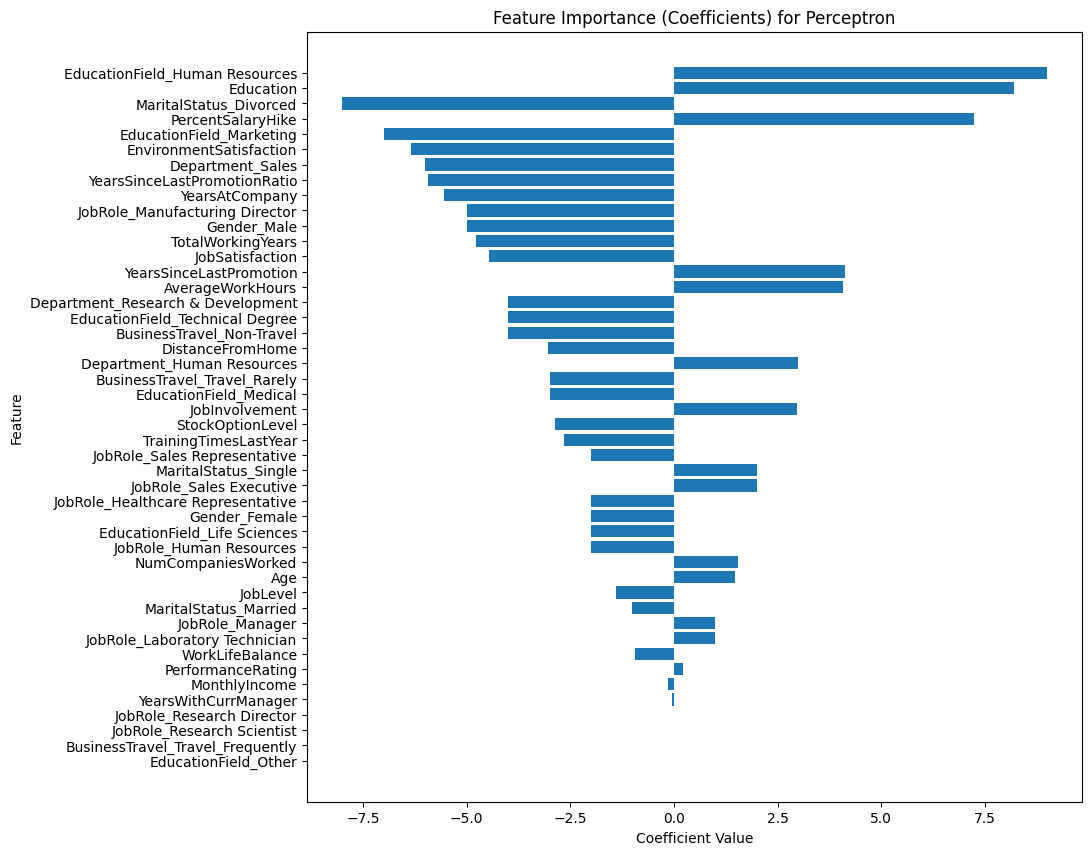

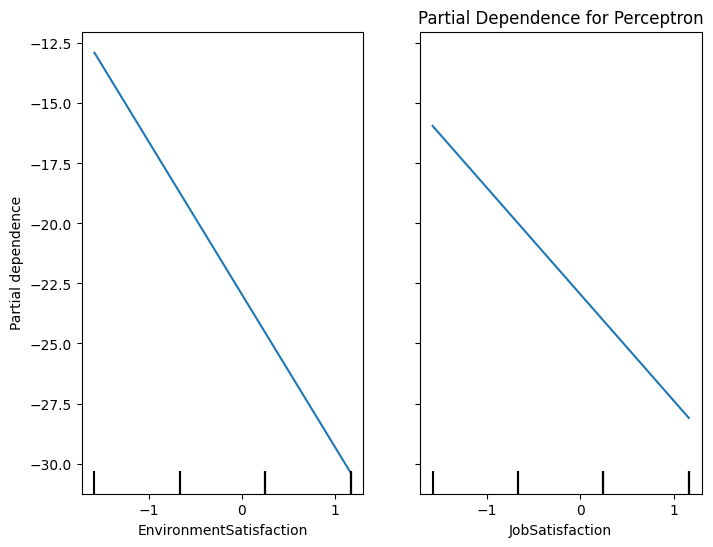

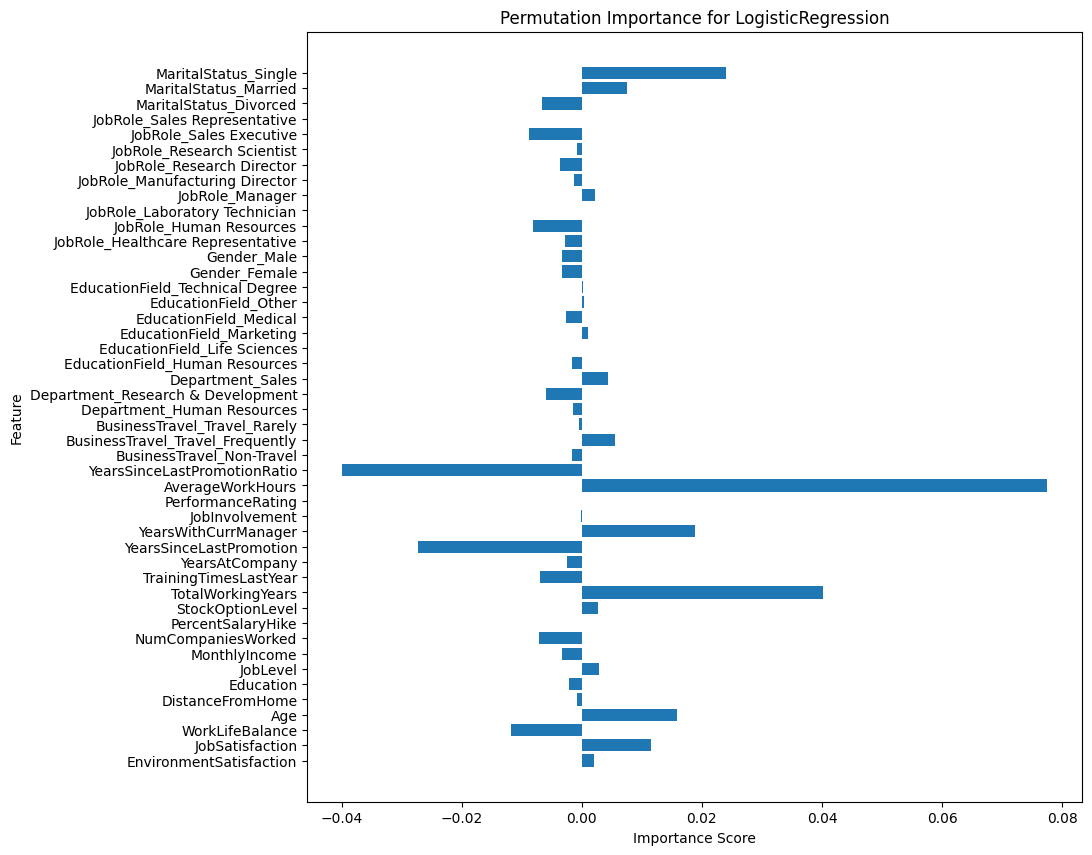

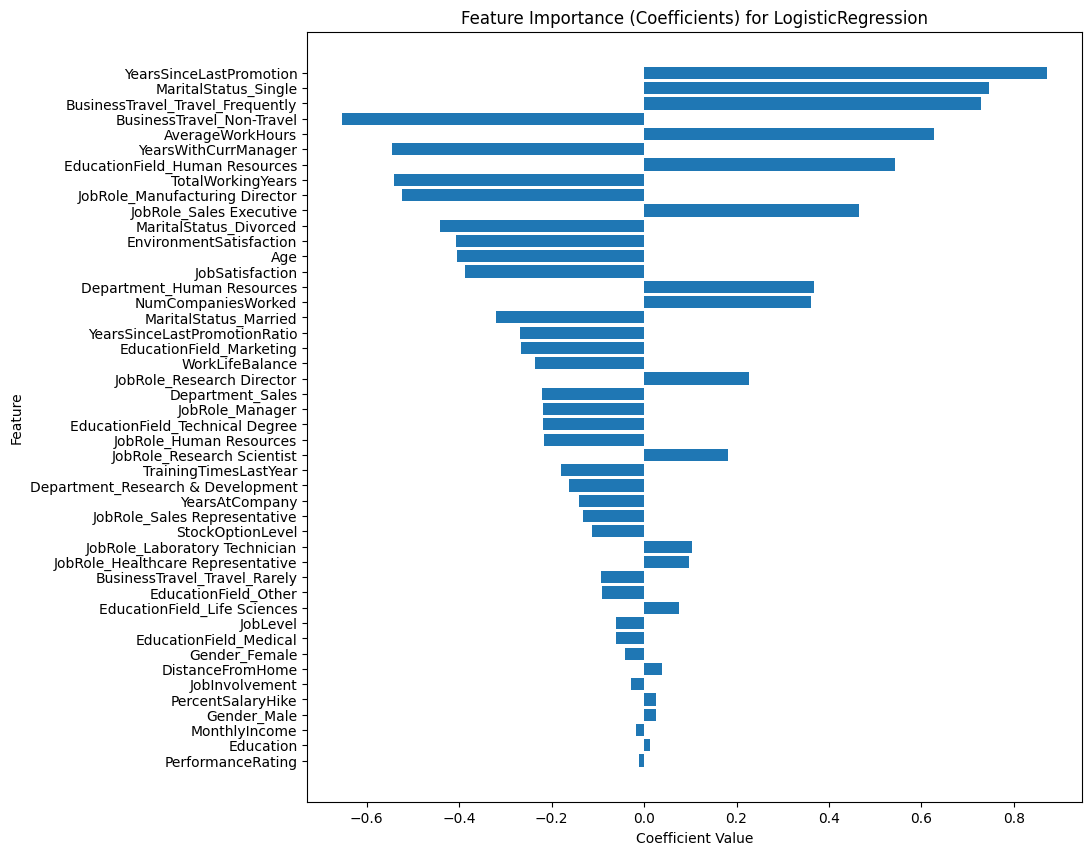

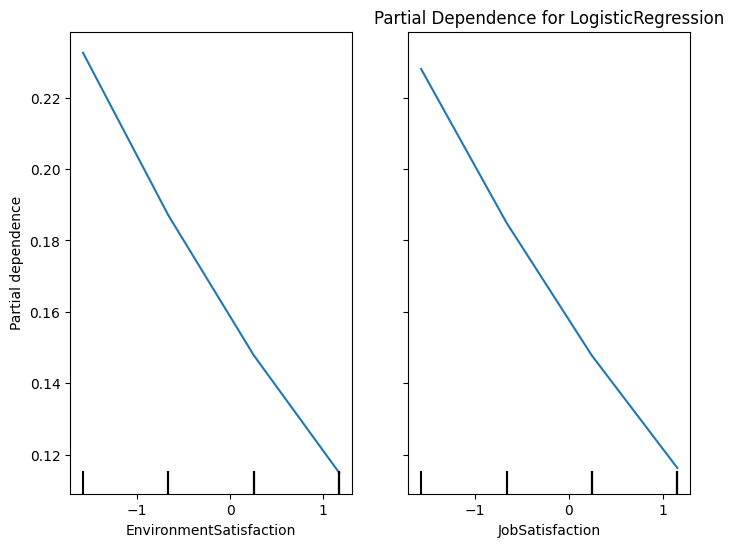

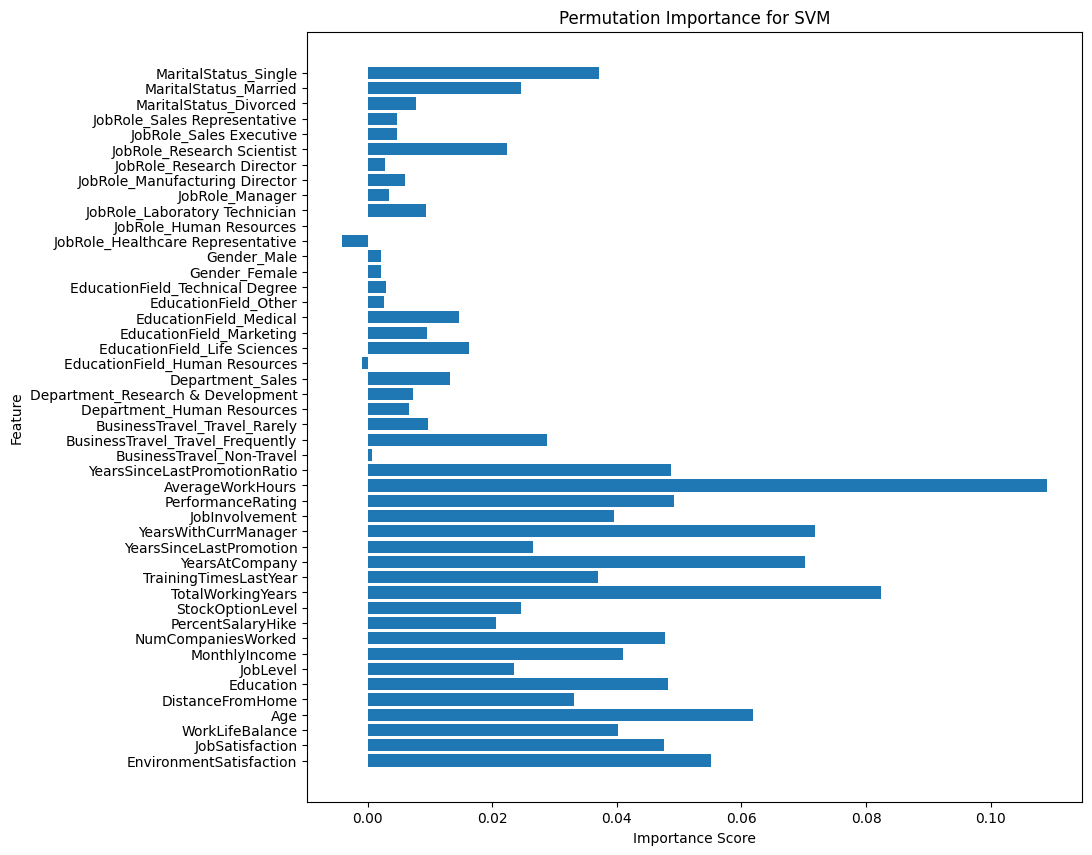

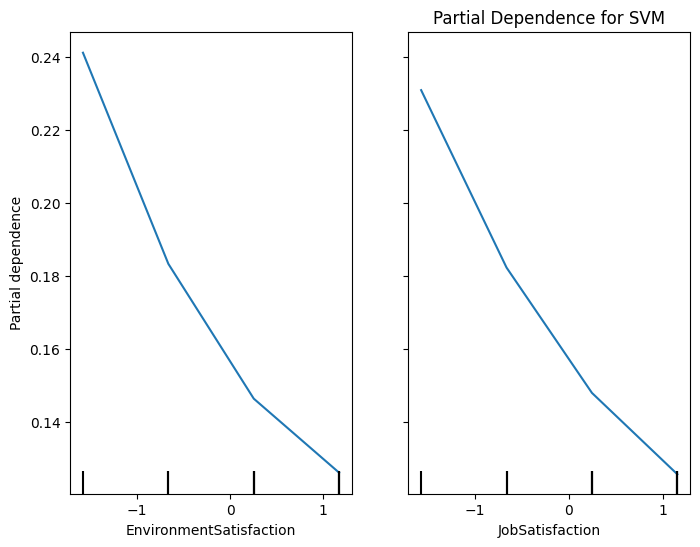

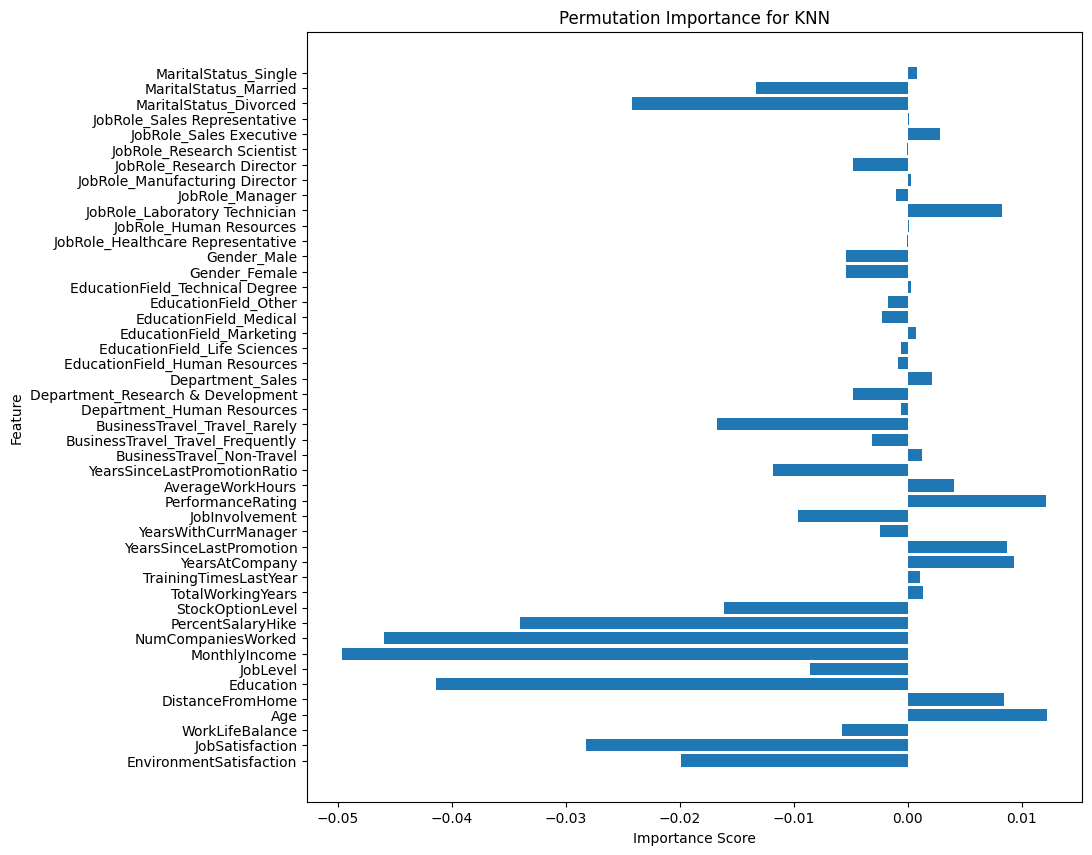

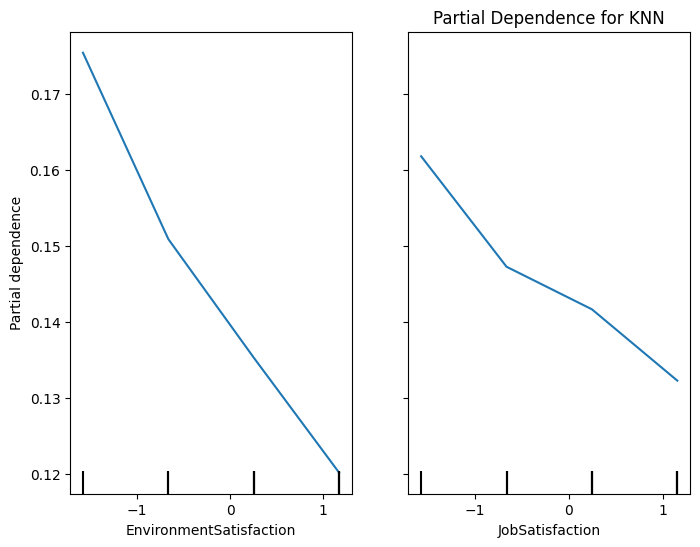

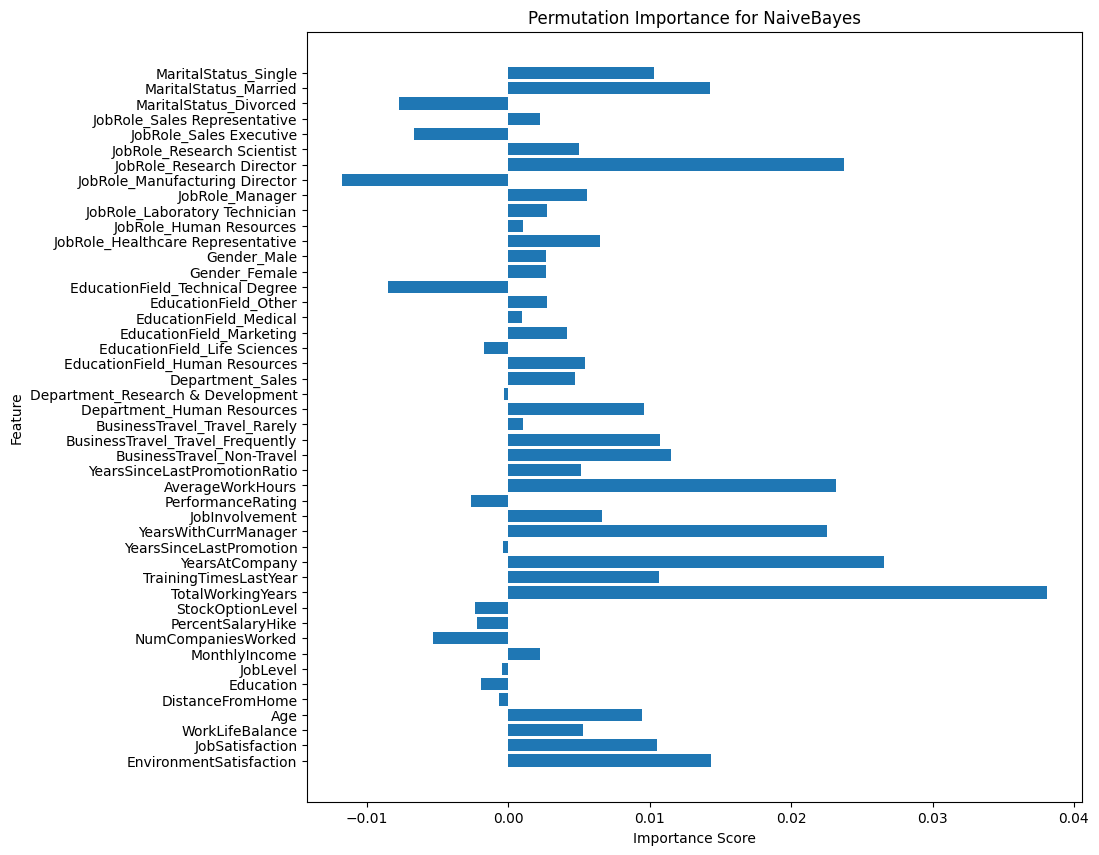

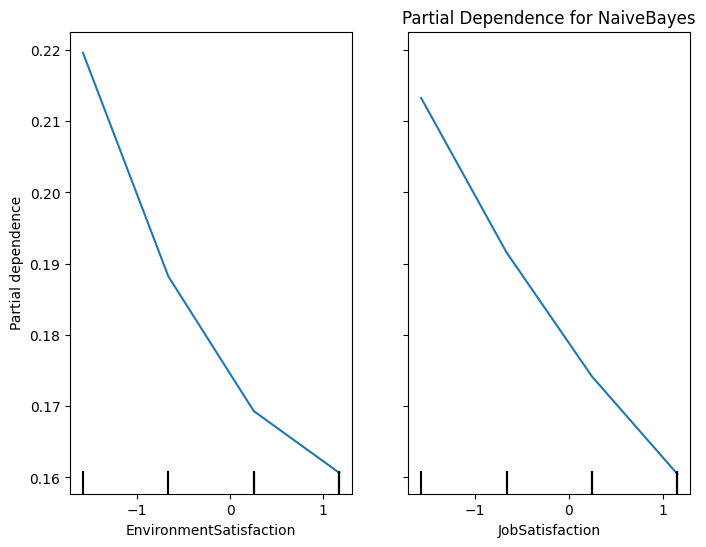

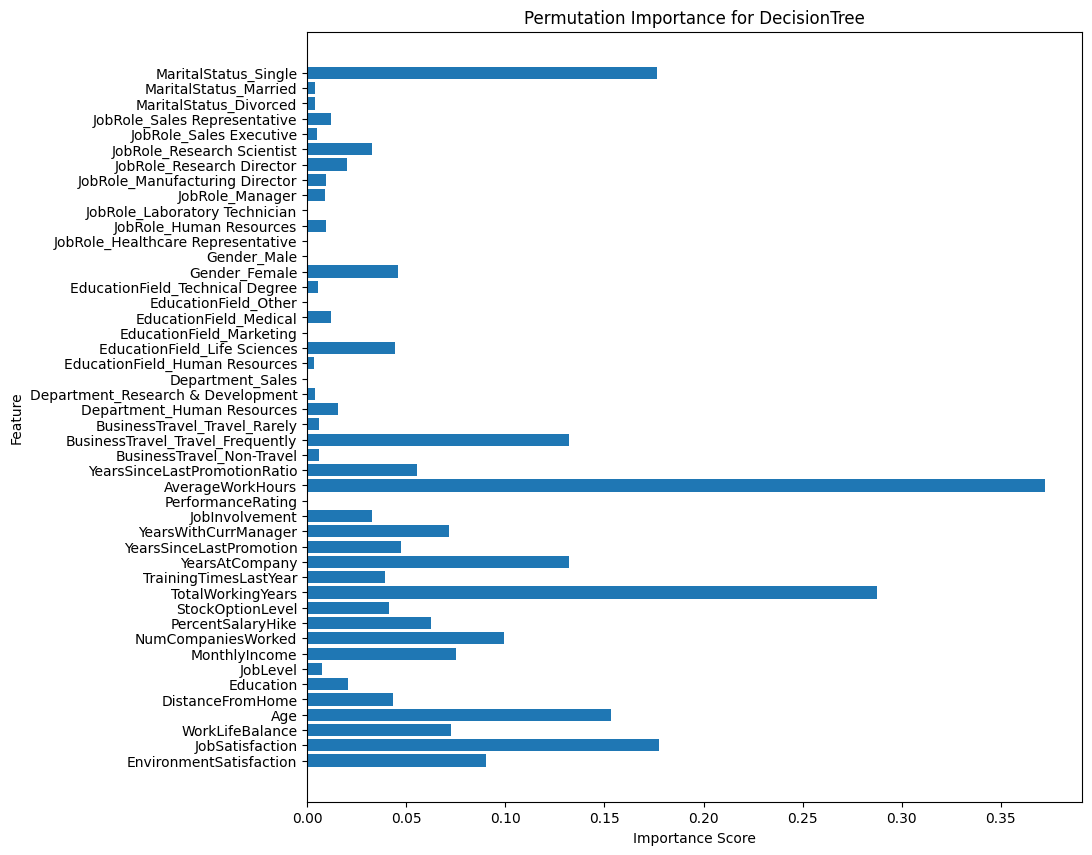

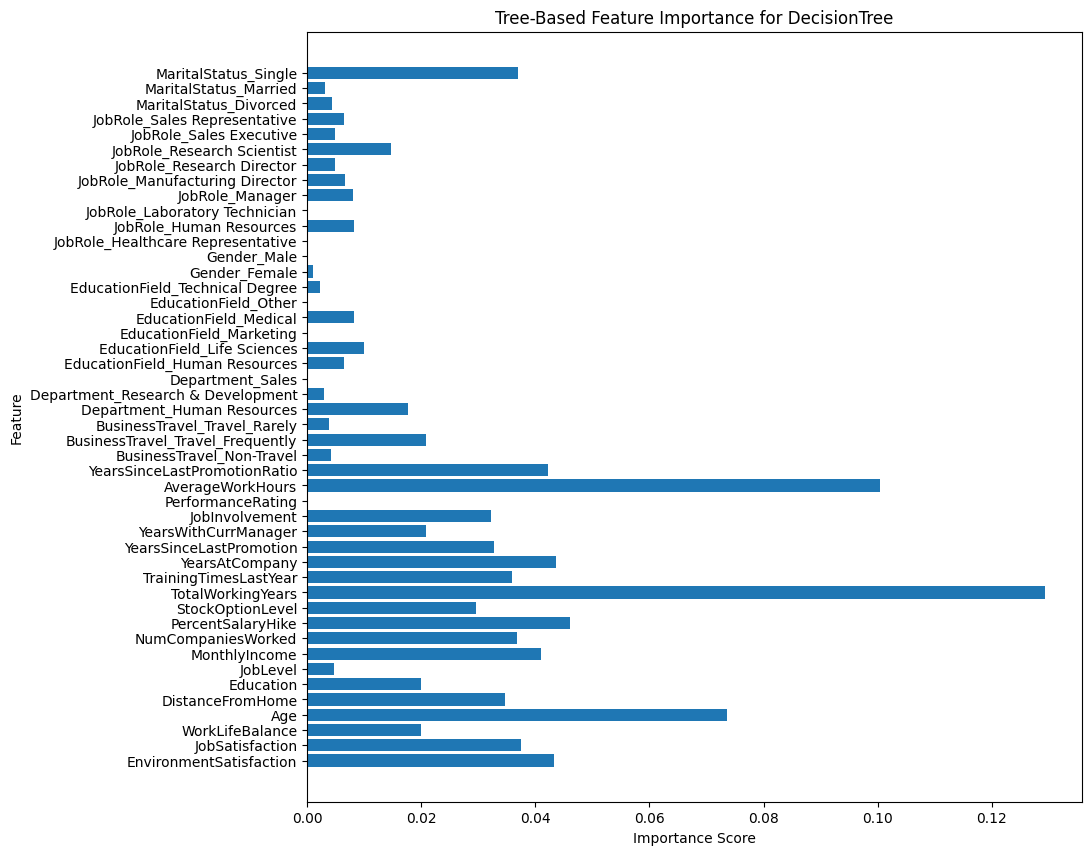

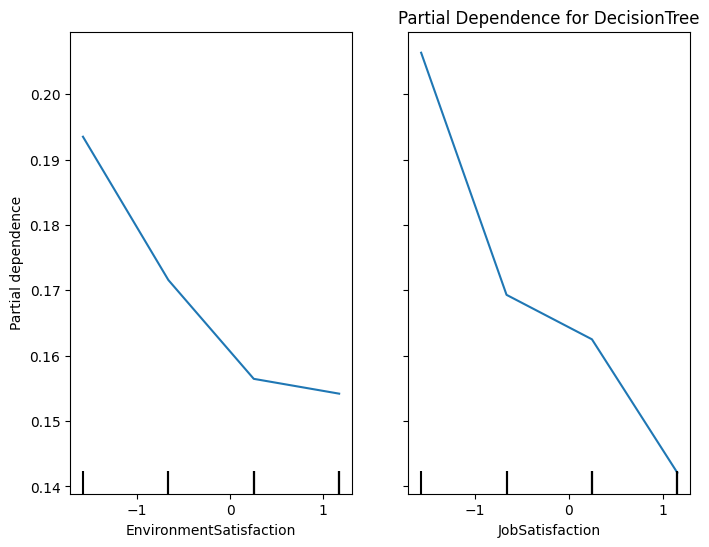

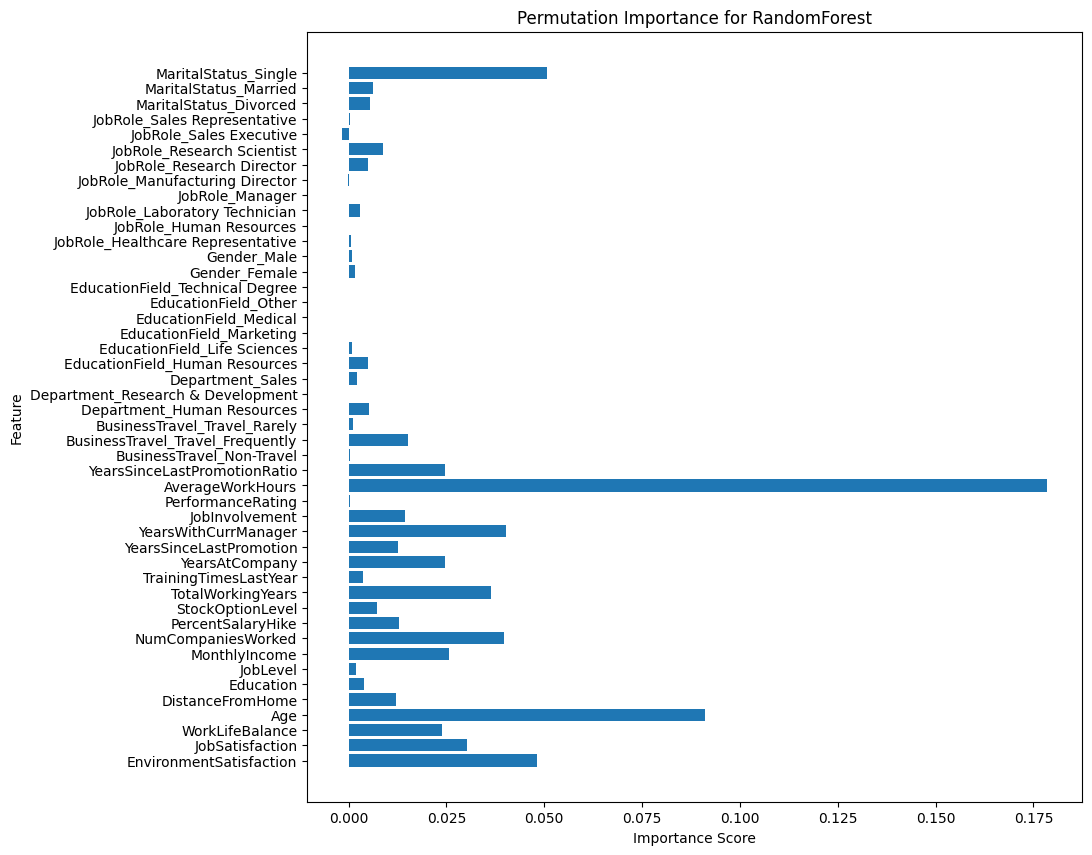

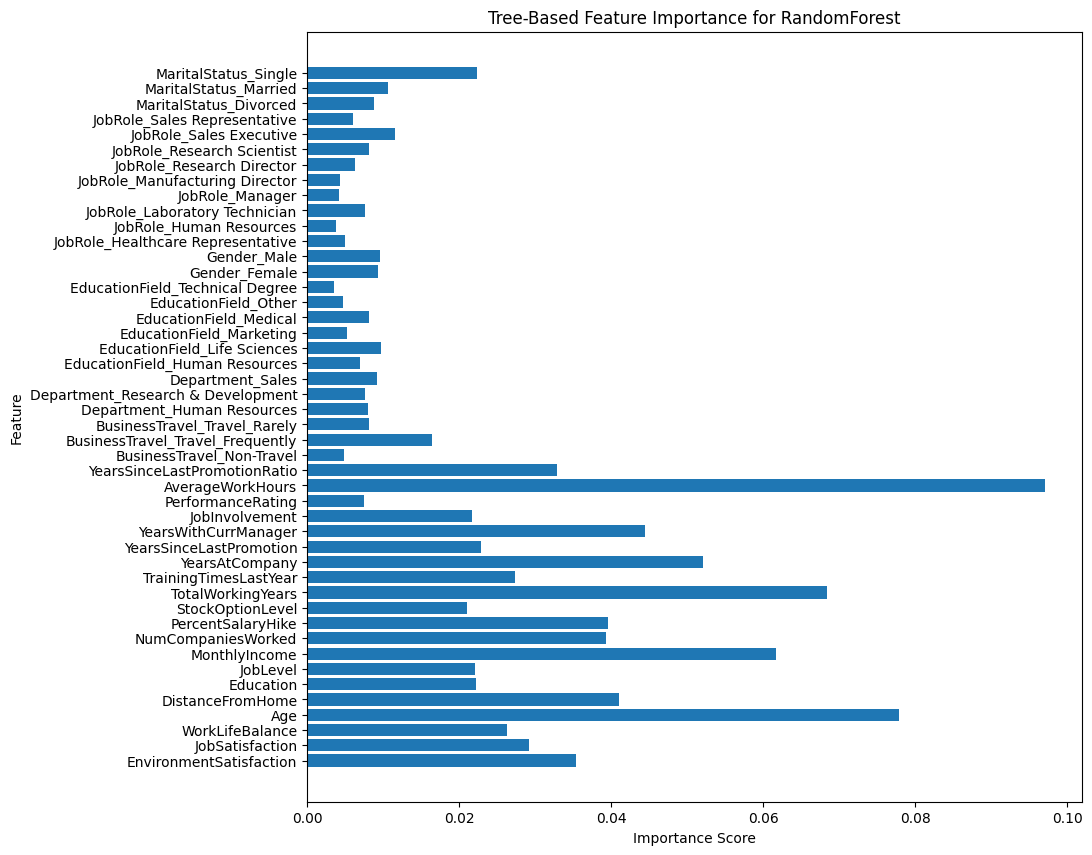

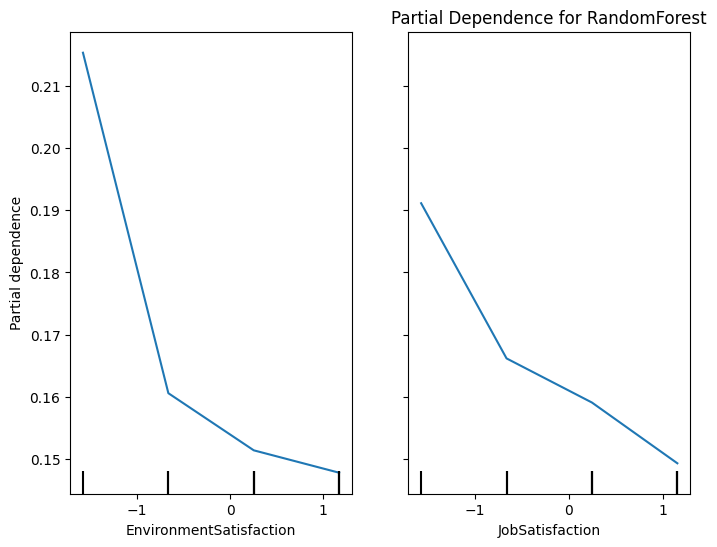

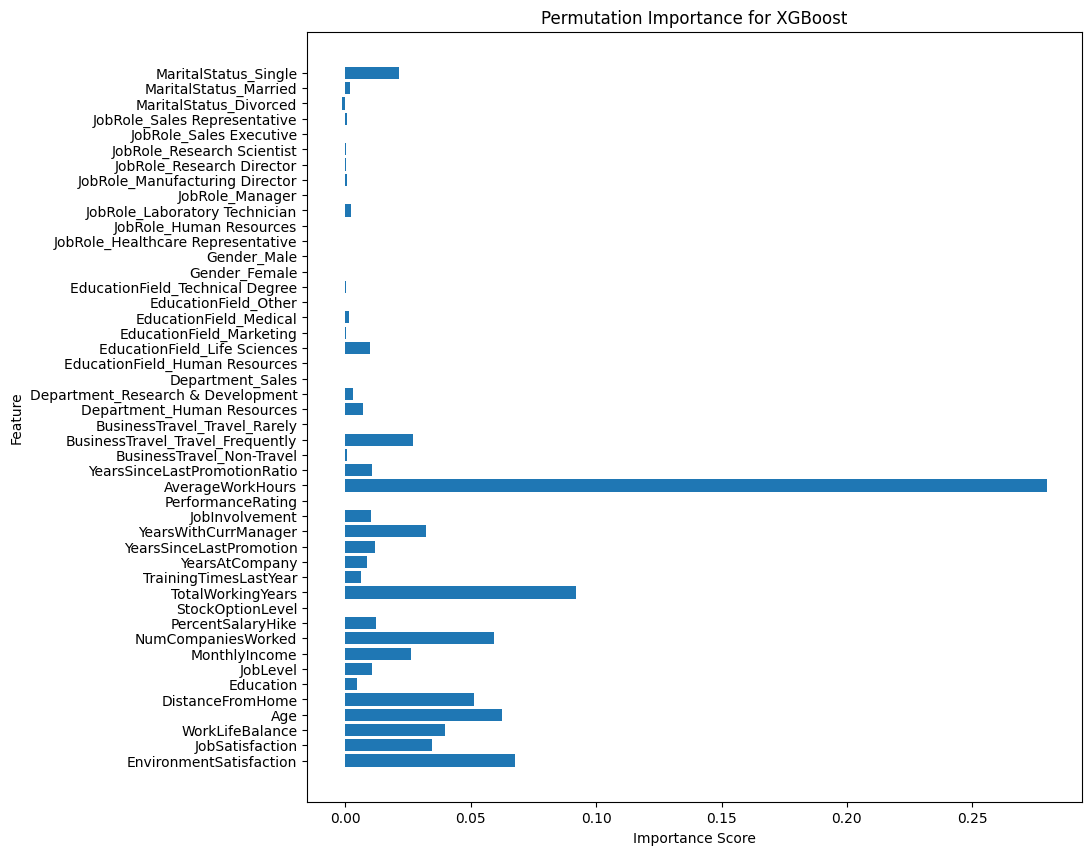

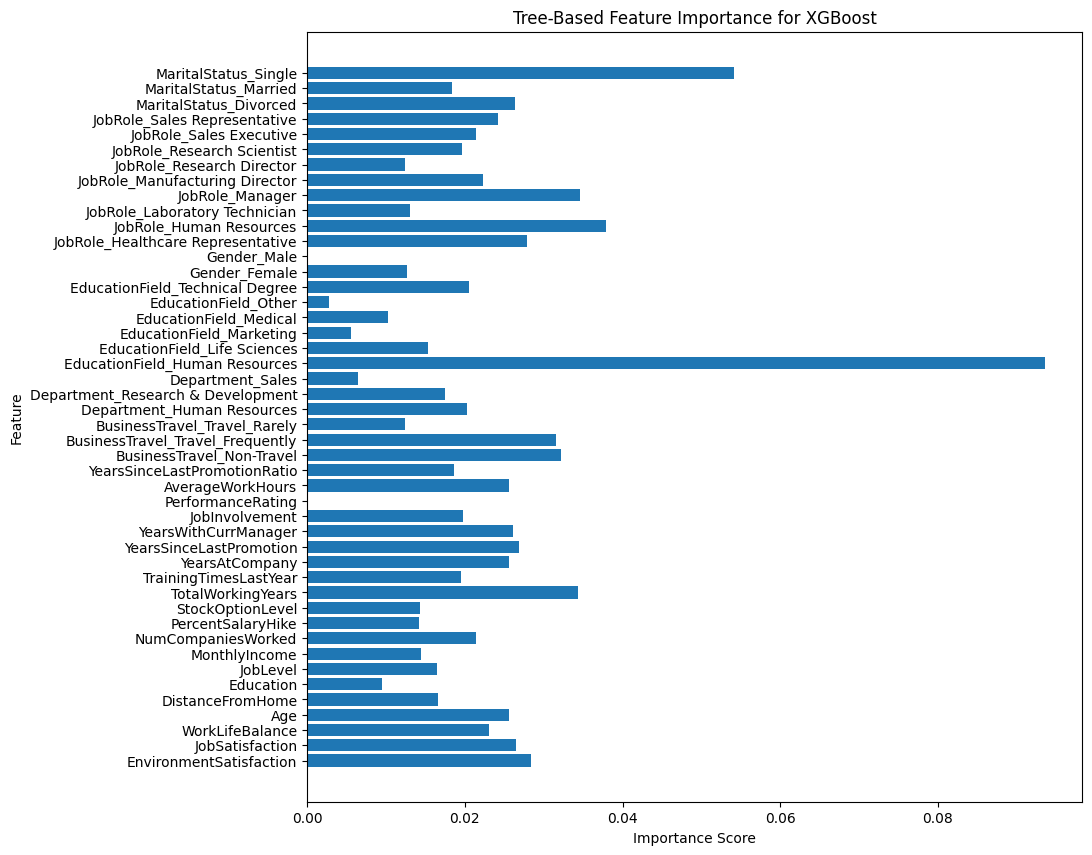

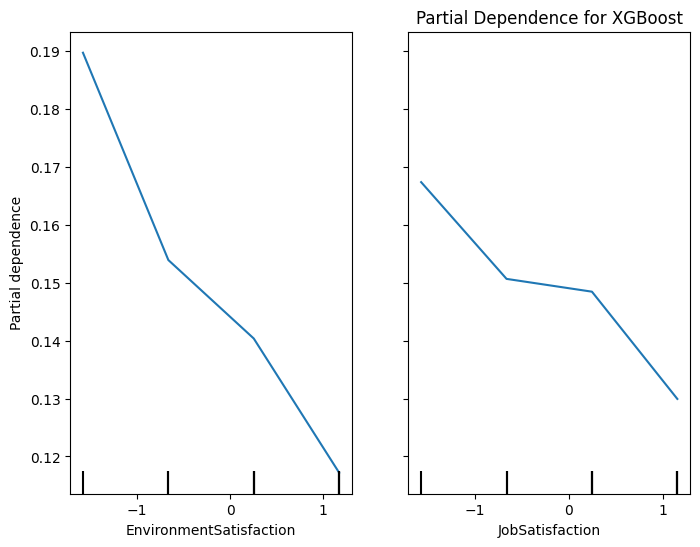

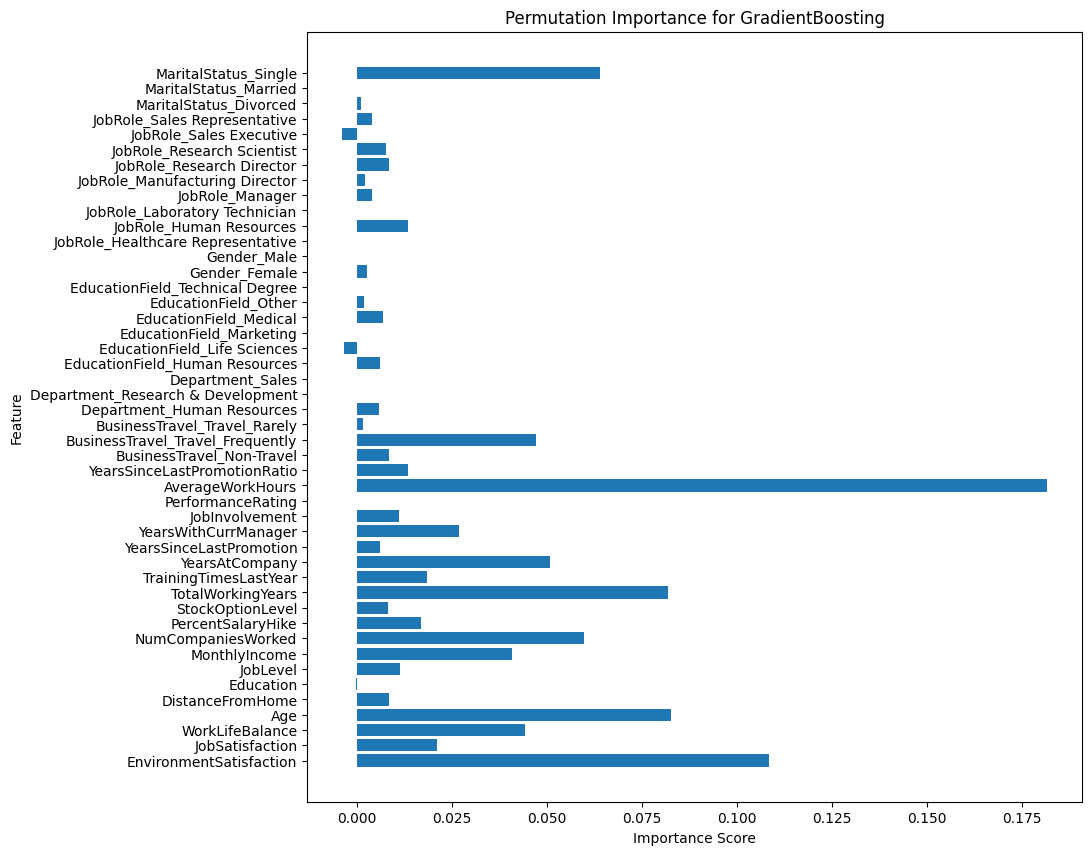

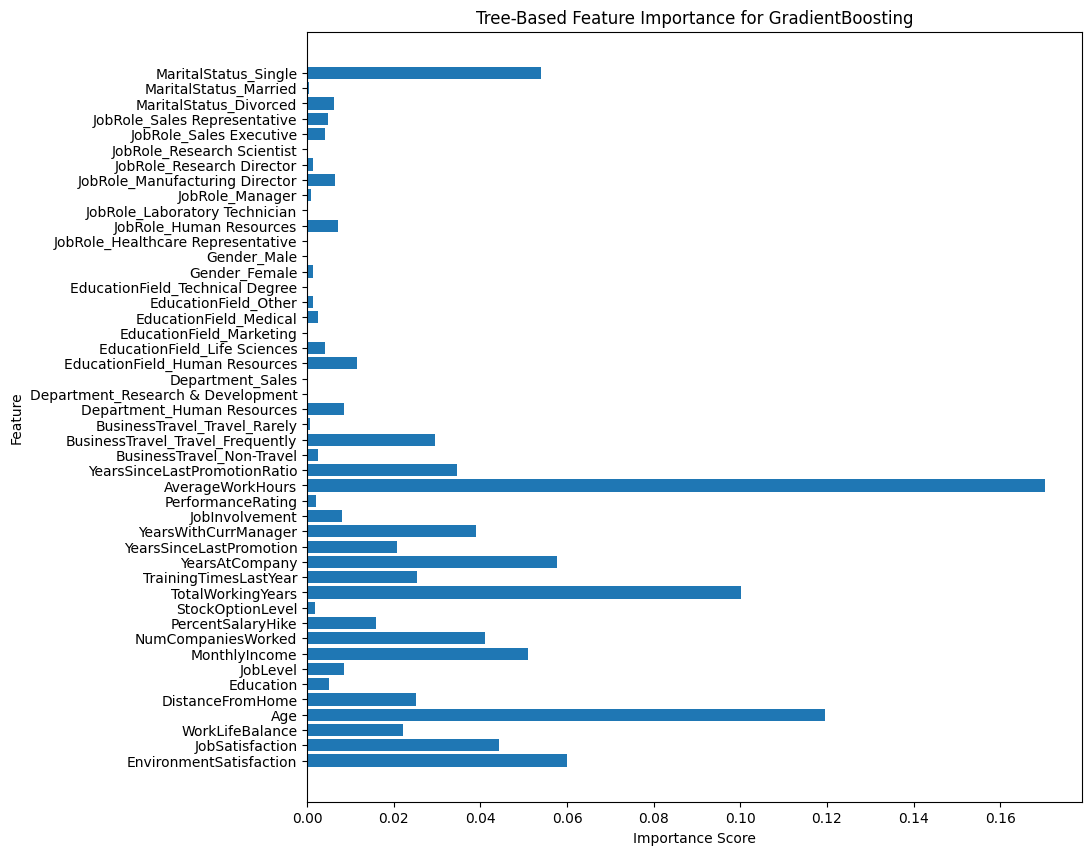

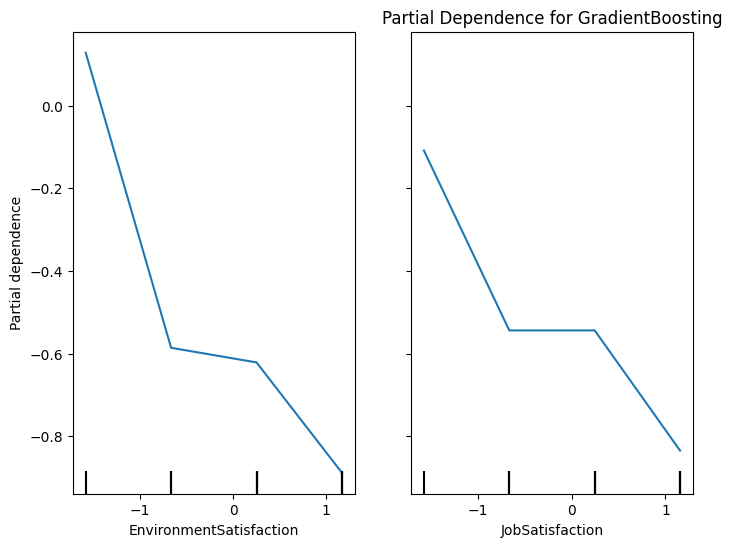

                Model  Precision    Recall  F1 Score       AUC
0          Perceptron   0.312057  0.206573  0.248588       NaN
1  LogisticRegression   0.632184  0.258216  0.366667  0.804035
2                 SVM   0.943925  0.474178  0.631250  0.930910
3                 KNN   0.447154  0.258216  0.327381  0.860265
4          NaiveBayes   0.456044  0.389671  0.420253  0.764514
5        DecisionTree   0.920930  0.929577  0.925234  0.957131
6        RandomForest   0.985000  0.924883  0.953995  0.993827
7             XGBoost   0.990148  0.943662  0.966346  0.983483
8    GradientBoosting   0.881818  0.455399  0.600619  0.913082


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- EnvironmentSatisfaction


In [210]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.inspection import permutation_importance, PartialDependenceDisplay

# Initialize storage for model performance
scores = []
feature_importances = {}
# Loop through models to calculate metrics and explanations
for name, model in models.items():
    y_pred = predictions[name]
    
    # Get probability scores if available
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    auc_score = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    
    # Store performance metrics
    scores.append({
        'Model': name,
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'AUC': auc_score
    })
    
    # **1. Permutation Importance**
    perm_importance = permutation_importance(model, X_test, y_test, scoring='f1', n_repeats=10, random_state=42)
    feature_importances[name] = perm_importance.importances_mean

    # Plot Permutation Importance
    plt.figure(figsize=(10, 10))
    plt.barh(X_test.columns, perm_importance.importances_mean)
    plt.xlabel("Importance Score")
    plt.ylabel("Feature")
    plt.title(f"Permutation Importance for {name}")
    plt.show()
    
    # **2. Tree-Based Feature Importance**
    if hasattr(model, "feature_importances_"):
        plt.figure(figsize=(10, 10))
        plt.barh(X_train.columns, model.feature_importances_)
        plt.xlabel("Importance Score")
        plt.ylabel("Feature")
        plt.title(f"Tree-Based Feature Importance for {name}")
        plt.show()

    # **3. Coefficients for Linear Models**
    if hasattr(model, "coef_"):
        coef = model.coef_.flatten()  # Get coefficients
        sorted_indices = np.argsort(np.abs(coef))  # Sort by absolute value
        
        plt.figure(figsize=(10, 10))
        plt.barh(np.array(X_train.columns)[sorted_indices], coef[sorted_indices])
        plt.xlabel("Coefficient Value")
        plt.ylabel("Feature")
        plt.title(f"Feature Importance (Coefficients) for {name}")
        plt.show()
    
    # **4. Partial Dependence Plots (PDP)**
    if len(X_train.columns) >= 2:
        fig, ax = plt.subplots(figsize=(8, 6))
        pdp = PartialDependenceDisplay.from_estimator(model, X_test, features=[0, 1], ax=ax)
        plt.title(f"Partial Dependence for {name}")
        plt.show()

# Convert scores into a DataFrame
scores_df = pd.DataFrame(scores)
print(scores_df)

# **5. Drop-Column Feature Importance (Slow, but robust)**
drop_col_importance = {}
base_f1 = f1_score(y_test, model.predict(X_test))

for feature in X_train.columns:
    X_test_drop = X_test.drop(columns=[feature])
    drop_f1 = f1_score(y_test, model.predict(X_test_drop))
    drop_col_importance[feature] = base_f1 - drop_f1  # Difference in F1 Score

# Sort and visualize drop-column importance
drop_col_sorted = sorted(drop_col_importance.items(), key=lambda x: x[1], reverse=True)
features, scores = zip(*drop_col_sorted)

plt.figure(figsize=(8, 6))
plt.barh(features, scores)
plt.xlabel("Drop in F1 Score")
plt.ylabel("Feature")
plt.title("Drop-Column Feature Importance")
plt.show()

## **1. Évaluation des Modèles et Performances**

### **1.1 Comparaison des Performances des Modèles**
#### **Modèles les plus précis :**
- **XGBoost** (**F1-score = 0.966, AUC = 0.983**)  
  ✅ Excellente capacité de prédiction et d’explication.  
  ✅ Meilleur compromis entre performance et rapidité.  

- **Random Forest** (**F1-score = 0.953, AUC = 0.993**)  
  ✅ Très performant et interprétable.  
  ❌ Temps d’entraînement plus élevé (**0.49s**).

- **Decision Tree** (**F1-score = 0.925, AUC = 0.957**)  
  ✅ Bon compromis entre précision et explicabilité.  
  ❌ Moins robuste que les modèles d’ensemble.

#### **Modèles à performance intermédiaire :**
- **SVM** (**F1-score = 0.631, AUC = 0.930**)  
  ✅ Bonne discrimination.  
  ❌ Trop lent en prédiction (**0.156s**), peu adapté à un grand volume de données.  

- **Gradient Boosting** (**F1-score = 0.600, AUC = 0.913**)  
  ✅ Bonne performance mais inférieure à XGBoost.  
  ❌ Temps d’entraînement élevé (**0.96s**).  

#### **Modèles les moins performants :**
- **Logistic Regression** (**F1-score = 0.366, AUC = 0.804**)  
  ✅ Très rapide.  
  ❌ Manque de précision.  

- **KNN, Naive Bayes, Perceptron**  
  ❌ Mauvais compromis entre précision et vitesse.  


### **1.2 Choix du Modèle Optimal**
#### **Modèle recommandé : XGBoost**
✅ **Meilleure précision (F1-score = 0.966, AUC = 0.983)**  
✅ **Rapide en entraînement (0.18s) et en prédiction (0.019s)**  
✅ **Explicable grâce aux scores d’importance des variables**  

> **Alternative :** Si le client privilégie l’explicabilité, **Random Forest** ou **Decision Tree** sont des options viables.

## 🔍 Analyse des Facteurs d'Attrition  

### 📊 Facteurs Clés de l'Attrition (par ordre d'importance décroissant)  
L’algorithme **XGBoost** a identifié les principaux facteurs influençant l’attrition :  

1. **⏳ Average Working Hours** → Trop d'heures de travail favorisent le départ.  
2. **📅 Total Working Years** → Expérience globale : les employés expérimentés partent plus facilement.  
3. **🏢 Num Companies Worked** → Plus un employé a changé d’entreprise, plus il est susceptible de partir.  
4. **🌿 Environment Satisfaction** → Insatisfaction de l’environnement de travail pousse à quitter.  
5. **🎂 Age** → Les plus jeunes sont plus mobiles professionnellement.  
6. **🚗 Distance From Home** → Un trajet long fatigue et motive à chercher ailleurs.  
7. **👨‍💼 Years With Current Manager** → Un changement ou une mauvaise relation avec le manager impacte l’attrition.  
8. **⚖️ Work-Life Balance** → Un équilibre travail-vie dégradé augmente les départs.  
9. **😊 Job Satisfaction** → Un faible engagement au travail favorise l’attrition.  
10. **✈️ Business Travel (Travel Frequently)** → Trop de déplacements fatiguent et incitent à partir.  
11. **💰 Monthly Income** → Un salaire jugé insuffisant pousse au changement.  


## 🎯 Recommandations  
✅ **Réduire les heures de travail excessives** : Favoriser une meilleure répartition des tâches.  
✅ **Offrir des perspectives aux employés expérimentés** : Éviter qu’ils se sentent stagnants.  
✅ **Améliorer l’environnement de travail** : Espaces adaptés, flexibilité, bien-être.  
✅ **Équilibrer le travail et la vie personnelle** : Télétravail, flexibilité des horaires.  
✅ **Revoir la politique de rémunération** : Ajuster les salaires pour rester compétitif.  
✅ **Gérer les déplacements professionnels** : Réduire les voyages excessifs ou proposer des compensations.  
✅ **Accompagner les changements de management** : Renforcer la communication et le coaching.  

🚀 **Prochaine étape :** Tester des stratégies d’amélioration et mesurer leur impact sur la rétention.  